<a href="https://colab.research.google.com/github/lwerth/INFO510/blob/master/final_info510.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. (Probability calculation.)
Let’s warm up with a probability calculation. The data set spread7.csv contains data from professional
(American) football games. The outcome is the difference between the favorite and underdog teams’
scores (diff in the CSV file). All of the games in this set were given a point spread of 7 points – that
is, the favorite team is expected to win by 7 points.

We’ll consider three conditional probabilities:

P(favorite wins|spread = 7)

P(favorite wins by at least 7|spread = 7)

P(favorite wins by at least 7|spread = 7 and favorite wins)


(a) Predict each of these probabilities by assuming that the quantity (outcome- point spread) is normally distributed with mean 0 and standard deviation 14.

>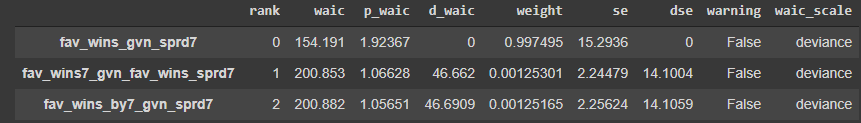


(b) Compute each of these probabilities empirically from counts in the data set.
> P(favorite wins|spread = 7) --> 9.78571
<!-- Posterior Mean = 41.74796342891308, Posterior SD = 0.13631478882863007 -->

> P(favorite wins by at least 7|spread = 7) --> 7.5714
<!-- Posterior Mean = 17.536076215635294, Posterior SD = 0.013996165575876367 -->

> P(favorite wins by at least 7|spread = 7 and favorite wins) --> 5.35714
<!-- Posterior Mean = 17.47260549235707, Posterior SD = 0.13936228694193722 -->




## Code for 1

In [1]:
#@title
import arviz
import pandas as pd, numpy as np, scipy as sp
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import seaborn as sns

In [2]:
#@title
# spread = pd.read_csv('My Drive/Fall2020/info510/Final/spread7.csv')
spread = pd.read_csv(r'spread7.csv')
spread

Unnamed: 0  home  favorite  ...  underdog_name  week diff
0            21     0        17  ...             NO     2   -6
1            24     1        28  ...            DET     2    5
2            35     1        35  ...             GB     3   12
3            37     1        20  ...            SEA     3   10
4            56     1        23  ...            IND     5    6
..          ...   ...       ...  ...            ...   ...  ...
132        2148     1        34  ...             NE    11   -3
133        2175     0        21  ...            CIN    13   12
134        2210     1        14  ...             GB    15   -2
135        2225     0        41  ...            ATL    16   24
136        2231     1        42  ...            DEN    17   22

[137 rows x 9 columns]

In [3]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pymc3 as pm, arviz as az, os
# import plot_tools

In [ ]:
n = len(spread)
sd = (14, ddof=1)
mean = 0
s = np.sqrt(sd)
y = np.concatenate((y[:5], y[6:]))


In [33]:
# Normal model in PyMC3
with pm.Model() as fav_wins_gvn_sprd7:
    sigma = pm.HalfCauchy('sigma', 5)
    m = pm.Normal('m', 0, spread.sum(axis=1))
    nu = pm.HalfCauchy('nu', 5)
    y_obs = pm.Normal('y_obs', mu = m, sigma = sigma, observed = spread['favorite_win'].values)
    
    trace_norm_win = pm.sample()
    sum_norm_win = pm.summary(trace_norm_win)
    replicates_ppc_win = pm.sample_posterior_predictive(trace_norm_win)
sum_norm_win
  


/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [nu, m, sigma]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4 seconds.


mean       sd  hdi_3%  hdi_97%  ...  ess_sd  ess_bulk  ess_tail  r_hat
m       0.775    0.038   0.697    0.839  ...  2164.0    2174.0    1215.0    1.0
sigma   0.425    0.027   0.377    0.474  ...  2098.0    2167.0    1490.0    1.0
nu     35.563  484.308   0.002   57.913  ...  1341.0    1911.0    1298.0    1.0

[3 rows x 11 columns]

In [34]:
# Normal model in PyMC3
with pm.Model() as fav_wins_by7_gvn_sprd7:
    sigma = pm.HalfCauchy('sigma', 5)
    m = pm.Normal('m', 0, spread.sum(axis=1))
    nu = pm.HalfCauchy('nu', 5)
    y_obs = pm.Normal('y_obs', mu = m, sigma = sigma, observed = spread['favorite_win_7'].values)
    
    trace_norm_win7 = pm.sample()
    sum_norm_win7 = pm.summary(trace_norm_win7)
    replicates_ppc_win7 = pm.sample_posterior_predictive(trace_norm_win7)
sum_norm_win7

/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [nu, m, sigma]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4 seconds.


mean       sd  hdi_3%  hdi_97%  ...  ess_sd  ess_bulk  ess_tail  r_hat
m       0.548    0.044   0.467    0.632  ...  2298.0    2293.0    1419.0    1.0
sigma   0.504    0.033   0.448    0.565  ...  2280.0    2321.0    1330.0    1.0
nu     23.078  132.271   0.001   55.230  ...  1097.0    1747.0    1214.0    1.0

[3 rows x 11 columns]

In [35]:
# Normal model in PyMC3
with pm.Model() as fav_wins7_gvn_fav_wins_sprd7:
    sigma = pm.HalfCauchy('sigma', 5)
    m = pm.Normal('m', 0, count_wins)
    nu = pm.HalfCauchy('nu', 5)
    y_obs = pm.Normal('y_obs', mu = m, sigma = sigma, observed = spread['favorite_win_7'].values)
    
    trace_norm_win_win7 = pm.sample()
    sum_norm_win_win7 = pm.summary(trace_norm_win_win7)
    replicates_ppc_win_win7 = pm.sample_posterior_predictive(trace_norm_win_win7)
sum_norm_win_win7

/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [nu, m, sigma]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4 seconds.


mean       sd  hdi_3%  hdi_97%  ...  ess_sd  ess_bulk  ess_tail  r_hat
m       0.548    0.044   0.466    0.627  ...  2182.0    2207.0    1617.0    1.0
sigma   0.503    0.032   0.445    0.562  ...  2221.0    2210.0    1352.0    1.0
nu     21.877  149.919   0.001   47.848  ...  1596.0    1782.0     880.0    1.0

[3 rows x 11 columns]

In [37]:
pm.compare({'fav_wins_gvn_sprd7':trace_norm_win, 'fav_wins_by7_gvn_sprd7':trace_norm_win7, 'fav_wins7_gvn_fav_wins_sprd7':trace_norm_win_win7}, ic='waic', scale = 'deviance') #


/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


rank     waic   p_waic  ...      dse warning waic_scale
fav_wins_gvn_sprd7              0  154.191  1.92367  ...        0   False   deviance
fav_wins7_gvn_fav_wins_sprd7    1  200.853  1.06628  ...  14.1004   False   deviance
fav_wins_by7_gvn_sprd7          2  200.882  1.05651  ...  14.1059   False   deviance

[3 rows x 9 columns]

In [16]:
#@title
fav = stats.norm(0, 14).cdf(7)
fav

0.6914624612740131

In [17]:
#@title
count_all = len(spread['diff'])

z1 = (count_all-0)/14
z1

9.785714285714286

In [4]:
#@title
scores = spread.drop(['Unnamed: 0', 'home', 'spread', 'favorite_name', 'underdog_name', 'week'], axis=1)
# scores.head()

fav_wins = np.array(scores['diff'].tolist())
# print(fav_wins)


In [25]:
#@title
wins_7 = np.where(fav_wins >=7, 1, 0)

wins = np.where(fav_wins > 0, 1, 0)

spread['favorite_win'] = wins
spread['favorite_win_7'] = wins_7
count_7 = spread['favorite_win_7'].sum()
count_wins = spread['favorite_win'].sum()
spread

Unnamed: 0  home  favorite  ...  diff  favorite_win favorite_win_7
0            21     0        17  ...    -6             0              0
1            24     1        28  ...     5             1              0
2            35     1        35  ...    12             1              1
3            37     1        20  ...    10             1              1
4            56     1        23  ...     6             1              0
..          ...   ...       ...  ...   ...           ...            ...
132        2148     1        34  ...    -3             0              0
133        2175     0        21  ...    12             1              1
134        2210     1        14  ...    -2             0              0
135        2225     0        41  ...    24             1              1
136        2231     1        42  ...    22             1              1

[137 rows x 11 columns]

In [26]:
#@title
count_wins

106

In [27]:
#@title
# count = spread['favorite_win'].sum()
count_7

75

In [22]:
#@title
z2 = (count-0)/14
z2

7.571428571428571

In [23]:
#@title
z_7 = (count_7-0)/14
z_7

7.571428571428571

In [24]:
#@title
fav_7 = stats.norm(0, 14).cdf(count)
fav_7

0.9999999999999816

In [25]:
#@title
diff = spread['diff']
# seven = spread.spread
quant = [di-7 for di in diff]


In [26]:
#@title
quant_m = np.array(quant).mean()
quant_m

3.1094890510948905

In [27]:
#@title
fav = stats.norm(0, 14).cdf(quant_m)
fav

0.5878844568354799

In [28]:
#@title
import pymc3

In [29]:
#@title
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
#@title
wins = np.where(fav_wins > 0, 1, 0)

spread['favorite_win'] = wins
# print(spread.head())
# wins.mean()

# wins
#would we want to get the total number of points per game won and use that as an average for the prior mean?
#or should we leave it as is below?
#ask Dr Murphy?

In [31]:
#@title
# P(favorite wins|spread = 7) --> (Posterior Mean = 41.74796342891308, Posterior SD = 0.13631478882863007)


# get prior mean
fav = spread.favorite
under = spread.underdog
# total = fav + under

total = [sum(i) for i in zip(fav, under)]
total_sum = sum(total)
avg = total_sum/len(total)
avg

43.481751824817515

In [32]:
#@title
#calculate the known variance (using basketball notebook example)
sigma = 7
prior_mean = avg #prior_m
prior_sd = .14

mean_draws = sp.stats.norm.rvs(prior_mean, prior_sd, 10000) # generates values of theta
prior_predictions1 = pd.Series([sp.stats.norm.rvs(theta, sigma) for theta in mean_draws]) # use the thetas to generate scores

In [33]:
#@title
#look at the minimum score possible in a game

min(prior_predictions1)

17.065809369413184

In [34]:
#@title
# create posterior calc

def posterior_params(data, prior_mean, prior_sd, sigma):
    xbar = data['diff'].mean()
    prior_prec = 1 / prior_sd ** 2
    data_prec = len(data) / sigma ** 2
    post_mean = (prior_mean * prior_prec + xbar * data_prec) / (prior_prec + data_prec)
    post_sd = np.sqrt(1/(prior_prec + data_prec))
    return post_mean, post_sd

In [35]:
#@title
# Calculate posterior

post_mean, post_sd = posterior_params(spread, prior_mean, prior_sd, sigma)
post_mean, post_sd

(41.74796342891308, 0.13631478882863007)

In [36]:
#@title
#pull mean for posterior to plot
mean_draws = sp.stats.norm.rvs(post_mean, post_sd, 1000)
post_predictions1 = pd.Series([sp.stats.norm.rvs(theta, sigma) for theta in mean_draws])


Text(0.5, 1.0, 'Posterior Preictions in Orange')

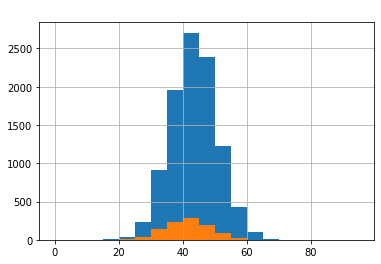

In [37]:
#@title
prior_predictions1.hist(bins = range(0, 100, 5))
plt.title("Prior Preictions", color = 'white', )

post_predictions1.hist(bins = range(0, 100, 5))
plt.title("Posterior Preictions in Orange", color = 'white')

In [38]:
#@title
# post_predictions.hist(bins = range(0, 100, 5))
# plt.title("Posterior Preictions in Orange", color = 'white')

In [39]:
#@title
# P(favorite wins by at least 7|spread = 7) --> (Posterior Mean = 17.536076215635294, Posterior SD = 0.013996165575876367)


# looking at the average difference across the teams who won by at least 7 --> 
# mean = 10.7

seven_diff = np.where(fav_wins >= 7, fav_wins, 0)
print(seven_diff)
print(seven_diff.mean())

spread['seven_diff'] = seven_diff
print(spread.head())

[ 0  0 12 10  0  0 18  0  0 14  0 14 27  0 22  0 15 17  0 24 21 18  0  0
  7  0  0 30  0 21 10  9  0 14 33  0  0  0  0 13  0  0  0 21 10 13  0 15
  0 10 21  0 11 27 20  0 32  0  0 34  0  0 14  0 27  0 31  0  0 17 10 28
  0 12  0  0  0  0 14  0 20  0 32 21 17 18  0  0  0  0 31  7  0 35  0 37
 37 10  0 17 28  0 20 28  0 30 35 13 14 11  0  0 18  0 28 27  0 32  0 10
  7 27  0  0  0 20 10 19  9  8 38  0  0 12  0 24 22]
10.861313868613138
   Unnamed: 0  home  favorite  ...  favorite_win  favorite_win_7 seven_diff
0          21     0        17  ...             0               0          0
1          24     1        28  ...             1               1          0
2          35     1        35  ...             1               1         12
3          37     1        20  ...             1               1         10
4          56     1        23  ...             1               1          0

[5 rows x 12 columns]


In [40]:
#@title
seven_fav = np.where(fav_wins >= 7, spread.favorite, 0)
spread['favorite_by_7'] = seven_fav
print(spread.head())

   Unnamed: 0  home  favorite  ...  favorite_win_7  seven_diff favorite_by_7
0          21     0        17  ...               0           0             0
1          24     1        28  ...               1           0             0
2          35     1        35  ...               1          12            35
3          37     1        20  ...               1          10            20
4          56     1        23  ...               1           0             0

[5 rows x 13 columns]


In [41]:
#@title
spread['favorite_by_7'].mean()

17.54014598540146

In [42]:
#@title
#calculate the known variance (using basketball notebook example)
sigma = 7
prior_mean2 = spread['favorite_by_7'].mean()
prior_sd2 = .14

mean_draws2 = sp.stats.norm.rvs(prior_mean2, prior_sd2, 10000) # generates values of theta
prior_predictions2 = pd.Series([sp.stats.norm.rvs(theta, sigma) for theta in mean_draws2]) # use the thetas to generate scores

In [43]:
#@title
print(min(prior_predictions2))
prior_predictions2

-8.60999836767214


0       14.836454
1       10.428056
2       17.307942
3       18.916686
4       10.385443
          ...    
9995    27.265207
9996    13.702791
9997    14.212643
9998    21.851809
9999    20.616770
Length: 10000, dtype: float64

In [44]:
#@title
def posterior_params_7(data, prior_mean, prior_sd, sigma):
    xbar = data['diff'].mean()
    prior_prec = 1 / prior_sd ** 2
    data_prec = len(data) / sigma ** 2
    post_mean = (prior_mean * prior_prec + xbar * data_prec) / (prior_prec + data_prec)
    post_sd = np.sqrt(1/(prior_prec + data_prec))
    return post_mean, post_sd

In [45]:
#@title
post_mean_7, post_sd_7 = posterior_params_7(spread, prior_mean2, prior_sd, sigma)
post_mean_7, post_sd_7

(17.154101237581965, 0.13631478882863007)

In [46]:
#@title
mean_draws_7 = sp.stats.norm.rvs(post_mean_7, post_sd_7, 1000)
post_predictions_7 = pd.Series([sp.stats.norm.rvs(theta, sigma) for theta in mean_draws_7])


Text(0.5, 1.0, 'Posterior Preictions in Orange')

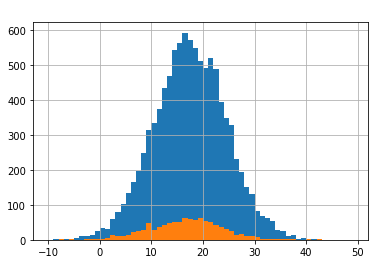

In [47]:
#@title
prior_predictions2.hist(bins = range(-10, 50, 1))
plt.title("Prior Preictions in Blue", color = 'white')

post_predictions_7.hist(bins = range(-10, 50, 1))
plt.title("Posterior Preictions in Orange", color = 'white')

In [48]:
#@title
# P(favorite wins by at least 7|spread = 7 and favorite wins) --> (Posterior Mean = 17.47260549235707, Posterior SD = 0.13936228694193722)


In [49]:
#@title
#calculate the known variance (using basketball notebook example)
sigma_win = 7 + fav_wins.mean()
prior_mean3 = spread['favorite_by_7'].mean()
prior_sd3 = .14

mean_draws3 = sp.stats.norm.rvs(prior_mean3, prior_sd3, 10000) # generates values of theta
prior_predictions3 = pd.Series([sp.stats.norm.rvs(theta, sigma_win) for theta in mean_draws3]) # use the thetas to generate scores

In [50]:
#@title
min(prior_predictions3)

-42.18707154208369

In [51]:
#@title
def posterior_params3(data, prior_mean, prior_sd, sigma):
    xbar = data['diff'].mean()
    prior_prec = 1 / prior_sd ** 2
    data_prec = len(data) / sigma ** 2
    post_mean = (prior_mean * prior_prec + xbar * data_prec) / (prior_prec + data_prec)
    post_sd = np.sqrt(1/(prior_prec + data_prec))
    return post_mean, post_sd

In [52]:
#@title
post_mean3, post_sd3 = posterior_params3(spread, prior_mean3, prior_sd3, sigma_win)
post_mean3, post_sd3

(17.47260549235707, 0.13936228694193722)

In [53]:
#@title
mean_draws3_pos = sp.stats.norm.rvs(post_mean3, post_sd3, 1000)
post_predictions_3 = pd.Series([sp.stats.norm.rvs(theta, sigma_win) for theta in mean_draws3_pos])


Text(0.5, 1.0, 'Posterior Preictions in Orange')

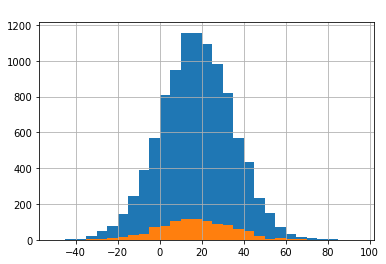

In [54]:
#@title
prior_predictions3.hist(bins = range(-50, 100, 5))
plt.title("Prior Preictions in Blue", color = 'white')

post_predictions_3.hist(bins = range(-50, 100, 5))
plt.title("Posterior Preictions in Orange", color = 'white')

# 2. (Beta-binomial model; posterior predictions.) 
During class, we spent a day reproducing the beta-binomial model used by Pzer to assess the eectiveness of their COVID-19 vaccine. To remind you, this model
assigned a Beta(0.7, 1.0) prior to the unknown parameter

$\quad \quad \theta =\frac{\pi_v}{\pi_v +\pi_0} \quad$ 

the probability that a person who contracts the disease was vaccinated, and used the beta-binomial
model:

$ \quad \quad n_v \sim Binomial(n,\theta) $ \
$ \quad \quad \theta \sim Beta (.7, 1.0)$

where $n_v$ is the count of cases among vaccinated subjects, and n is the total count of cases in the study. At the time of our discussion, Pfizer had announced a case sample size of 94 individuals, and a vaccine effectiveness rate of "at least 90%". Depending on the interpretation of the latter phrase, we could conclude either that there were 8 cases in the vaccinated group and 86 in the placebo group; or, that there were 3 cases in the vaccinated group and 91 in the placebo group. As of 3 Dec, Pfizer's updated data shows 170 cases total: 8 in the vaccinated group and 162 in the unvaccinated group. 

Based on this, which of the two interpretations of the intermediate data appears to have been correct? To answer this, compute the posterior distribution of $\theta$ under each interpretation, and then compute the posterior predictive probability of the remaining data. (Note that what the "remaining data" is depends on the initial assumption.)

> The second interpretation of the data, $p(\theta|y) \sim Beta(.700102 +3, 1+91) \sim 94.5\% $ seems to be the more likely case because its $ \theta$ posterior density is about .039 (mean), and the posterior predictive distribution of the remaining data from Dec. 3rd is about .049 (mean). These numbers are compared to the posterior density mean of .099 from the first case with 8 observed cases ( $p(\theta|y) \sim Beta(.700102 +8, 1+86) \sim 90\% $.

Posterior Predictive Plot for remaining data from Dec. 3rd
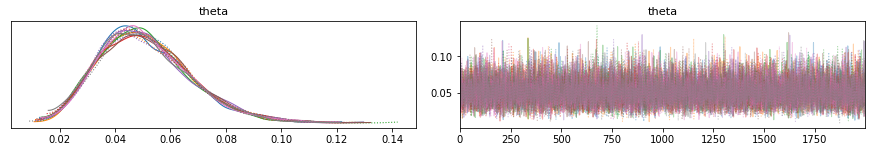

## Code for 2

In [89]:
! pip install pymc3 --upgrade
! pip install arviz
! pip install pandas --upgrade
!pip install modelutils

     |████████████████████████████████| 1.9MB 8.8MB/s 
     |████████████████████████████████| 2.8MB 31.5MB/s 
     |████████████████████████████████| 1.5MB 51.5MB/s 
     |████████████████████████████████| 4.3MB 32.2MB/s 
     |████████████████████████████████| 737kB 31.0MB/s 
     |████████████████████████████████| 102kB 12.5MB/s 
     |████████████████████████████████| 296kB 42.5MB/s 
  Created wheel for theano-pymc: filename=Theano_PyMC-1.0.11-cp36-none-any.whl size=2572023 sha256=9ac5338c4f8bdfdeab51daa9ed200c67e1bfea31d1429d9bb2ab74029d66f161
  Stored in directory: /root/.cache/pip/wheels/26/b2/77/4ee2bb9b1c1de7de771254a5e379d898273d8114237b0df686
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7667 sha256=ece5e88a46254aa4c9416ecd54cd4f8f8c429ac66f5460d804a60a16e9f8070a
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built theano-pymc contextvars
  Found existing installation:

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.1.5)
     |████████████████████████████████| 51kB 4.2MB/s 


In [ ]:
import numpy as np, scipy as sp, pandas as pd, pymc3 as pm, matplotlib.pyplot as plt, theano.tensor as tt
from scipy import stats
import modelutils
from modelutils import *
import arviz as az

In [ ]:
grid = np.linspace(0, 1, 1000)
α0 = 0.7
β0 = 1
prior = sp.stats.beta(α0, β0)

plt.figure(figsize=(10, 7))
plt.plot(grid, prior.pdf(grid), color = 'black')
plt.fill_between(grid, np.zeros_like(grid),  prior.pdf(grid), color = 'blue', alpha = 0.3)
plt.title('Prior probability for $\\theta$')
plt.vlines(x=prior.mean(), ymin = 0, ymax = 5.5, color = 'black', linestyles='--', label = 'Prior mean $\\theta$')
plt.xlabel('$\\theta$')
plt.ylabel('density')
plt.legend()
plt.show()

In [ ]:
def logp_ab(value):
    '''Transformation for the hyperprior. Theano tensor magic.'''
    return tt.log(tt.pow(tt.sum(value), -5/2))

with pm.Model() as hierarchical_model:
    # Uninformative prior for alpha and beta
    ab = pm.HalfFlat('ab',
                     shape=2,
                     testval=np.asarray([α0, β0]))
    pm.Potential('p(a, b)', logp_ab(ab))

    # Distributions for theta
    theta = pm.Beta('theta', alpha=ab[0], beta=ab[1]) #, shape = 8)
    
    # Data distribution
    y_obs = pm.Binomial('y_obs', p = theta, observed = 8, n=170)
    
    trace = pm.sample(2000, target_accept = 1)

In [ ]:
pm.summary(trace)

In [ ]:
ppc = pm.sample_posterior_predictive(trace, 10, model = hierarchical_model)
ppc

In [ ]:
# with pm.Model() as pooled_model_1:
#     theta = pm.Beta('theta', α0, β0)
#     y_obs = pm.Binomial('y_obs', p=theta, n=94, observed = 8) #n=df.sum().sum(), observed = df.bicycles.sum())

# with pooled_model_1:
#     p_trace = pm.sample(2000)    
#     p_sum = pm.summary(p_trace)

# p_sum

with pm.Model() as separate_model_1:
    theta = pm.Beta('theta', α0, β0, shape = 8)
    y_obs = pm.Binomial('y_obs', p=theta, n=94, observed = 8)
    
    separate_trace_1 = pm.sample(1000)
    s_sum = pm.summary(separate_trace_1)
s_sum


In [ ]:
# Posterior assuming 8 cases in vaccine arm
posterior_1 = sp.stats.beta(α0 + 8, β0 + 86)
plt.figure(figsize=(10, 7))
plt.plot(grid, posterior_1.pdf(grid), color = 'black')
plt.fill_between(grid, np.zeros_like(grid),  posterior_1.pdf(grid), color = 'blue', alpha = 0.3)
plt.title('Posterior probability for $\\theta$')
plt.vlines(x=posterior_1.mean(), ymin = 0, ymax = max(posterior_1.pdf(grid)), color = 'black', linestyles='--', label = 'Posterior mean $\\theta$')
plt.vlines(x=posterior_1.ppf(0.025), ymin = 0, ymax = max(posterior_1.pdf(grid)), color = 'green', linestyles='--', lw=1, label = 'Posterior 95% bounds')
plt.vlines(x=posterior_1.ppf(0.975), ymin = 0, ymax = max(posterior_1.pdf(grid)), color = 'green', linestyles='--', lw=1)
plt.xlabel('$\\theta$')
plt.ylabel('density')
plt.legend()
plt.show()
print(posterior_1.mean())

In [ ]:
with pm.Model() as pooled_model_2:
    theta = pm.Beta('theta', α0, β0)
    y_obs = pm.Binomial('y_obs', p=theta, n=94, observed = 3) #n=df.sum().sum(), observed = df.bicycles.sum())

with pooled_model_2:
    p_trace2 = pm.sample(2000)    
    p_sum2 = pm.summary(p_trace2)

print(p_sum2)

with pm.Model() as separate_model_2:
    theta = pm.Beta('theta', α0, β0, shape = 3)
    y_obs = pm.Binomial('y_obs', p=theta, n=94, observed = 3)
    
    separate_trace_2 = pm.sample(1000)
    s_sum2 = pm.summary(separate_trace_2)
s_sum2


In [ ]:
# Posterior assuming 3 cases in vaccine arm
posterior_2 = sp.stats.beta(α0 + 3, β0 + 91)
plt.figure(figsize=(10, 7))
plt.plot(grid, posterior_2.pdf(grid), color = 'black')
plt.fill_between(grid, np.zeros_like(grid),  posterior_2.pdf(grid), color = 'blue', alpha = 0.3)
plt.title('Posterior probability for $\\theta$')
plt.vlines(x=posterior_2.mean(), ymin = 0, ymax = max(posterior_2.pdf(grid)), color = 'black', linestyles='--', label = 'Posterior mean $\\theta$')
plt.vlines(x=posterior_2.ppf(0.025), ymin = 0, ymax = max(posterior_2.pdf(grid)), color = 'green', linestyles='--', lw=1, label = 'Posterior 95% bounds')
plt.vlines(x=posterior_2.ppf(0.975), ymin = 0, ymax = max(posterior_2.pdf(grid)), color = 'green', linestyles='--', lw=1)
plt.xlabel('$\\theta$')
plt.ylabel('density')
plt.legend()
plt.show()
print(posterior_2.mean())

In [ ]:
with pm.Model() as sep_model_3:
    theta = pm.Beta('theta', α0, β0, shape =8)
    y_obs = pm.Binomial('y_obs', p=theta, n=170, observed = 8) #n=df.sum().sum(), observed = df.bicycles.sum())
    
    s_trace3 = pm.sample(2000)    
    s_sum3 = pm.summary(s_trace3)

s_sum3


In [ ]:
# Posterior with full data
posterior_4 = sp.stats.beta(α0 + 8, β0 + 162)
plt.figure(figsize=(10, 7))
plt.plot(grid, posterior_4.pdf(grid), color = 'black')
plt.fill_between(grid, np.zeros_like(grid),  posterior_4.pdf(grid), color = 'blue', alpha = 0.3)
plt.title('Posterior probability for $\\theta$')
plt.vlines(x=posterior_4.mean(), ymin = 0, ymax = max(posterior_4.pdf(grid)), color = 'black', linestyles='--', label = 'Posterior mean $\\theta$')
plt.vlines(x=posterior_4.ppf(0.025), ymin = 0, ymax = max(posterior_4.pdf(grid)), color = 'green', linestyles='--', lw=1, label = 'Posterior 95% bounds')
plt.vlines(x=posterior_4.ppf(0.975), ymin = 0, ymax = max(posterior_4.pdf(grid)), color = 'green', linestyles='--', lw=1)
plt.xlabel('$\\theta$')
plt.ylabel('density')
plt.legend()
print(posterior_4.mean())

In [ ]:
# pm.plot_posterior(trace, var_names=['ab'])

with sep_model_3:
    ppc = pm.sample_posterior_predictive(
        s_trace3, var_names=['y_obs', 'theta']
    )

In [ ]:
ppc['y_obs'].shape

In [ ]:
sep_3 = az.from_pymc3(s_trace3, posterior_predictive=ppc)
az.plot_ppc(sep_3);

In [ ]:
dec_3 = az.from_pymc3(trace, posterior_predictive=ppc)
az.plot_ppc(dec_3);

In [ ]:
pm.traceplot(s_trace3, var_names=['theta'])

In [ ]:
az.plot_trace(s_trace3)

In [ ]:
az.plot_trace(trace)

# 3. (Regression, DAGs, causal inference.)
The data set NWOGrants.csv contains outcomes for scientific funding applications from the Netherlands Organization for Scientific Research. This has a similar structure to the UC Berkeley admissions data we considered during class.

(a) We wish to consider the question of the causal effect of gender on funding. Consider that gender may have a direct effect on funding, as well as an indirect effect that goes through discipline. Draw a DAG indicating this set of causal effects and use one or more binomial GLMs to estimate this eect. (i.e., use a binomial likelihood with a logit link function.) 


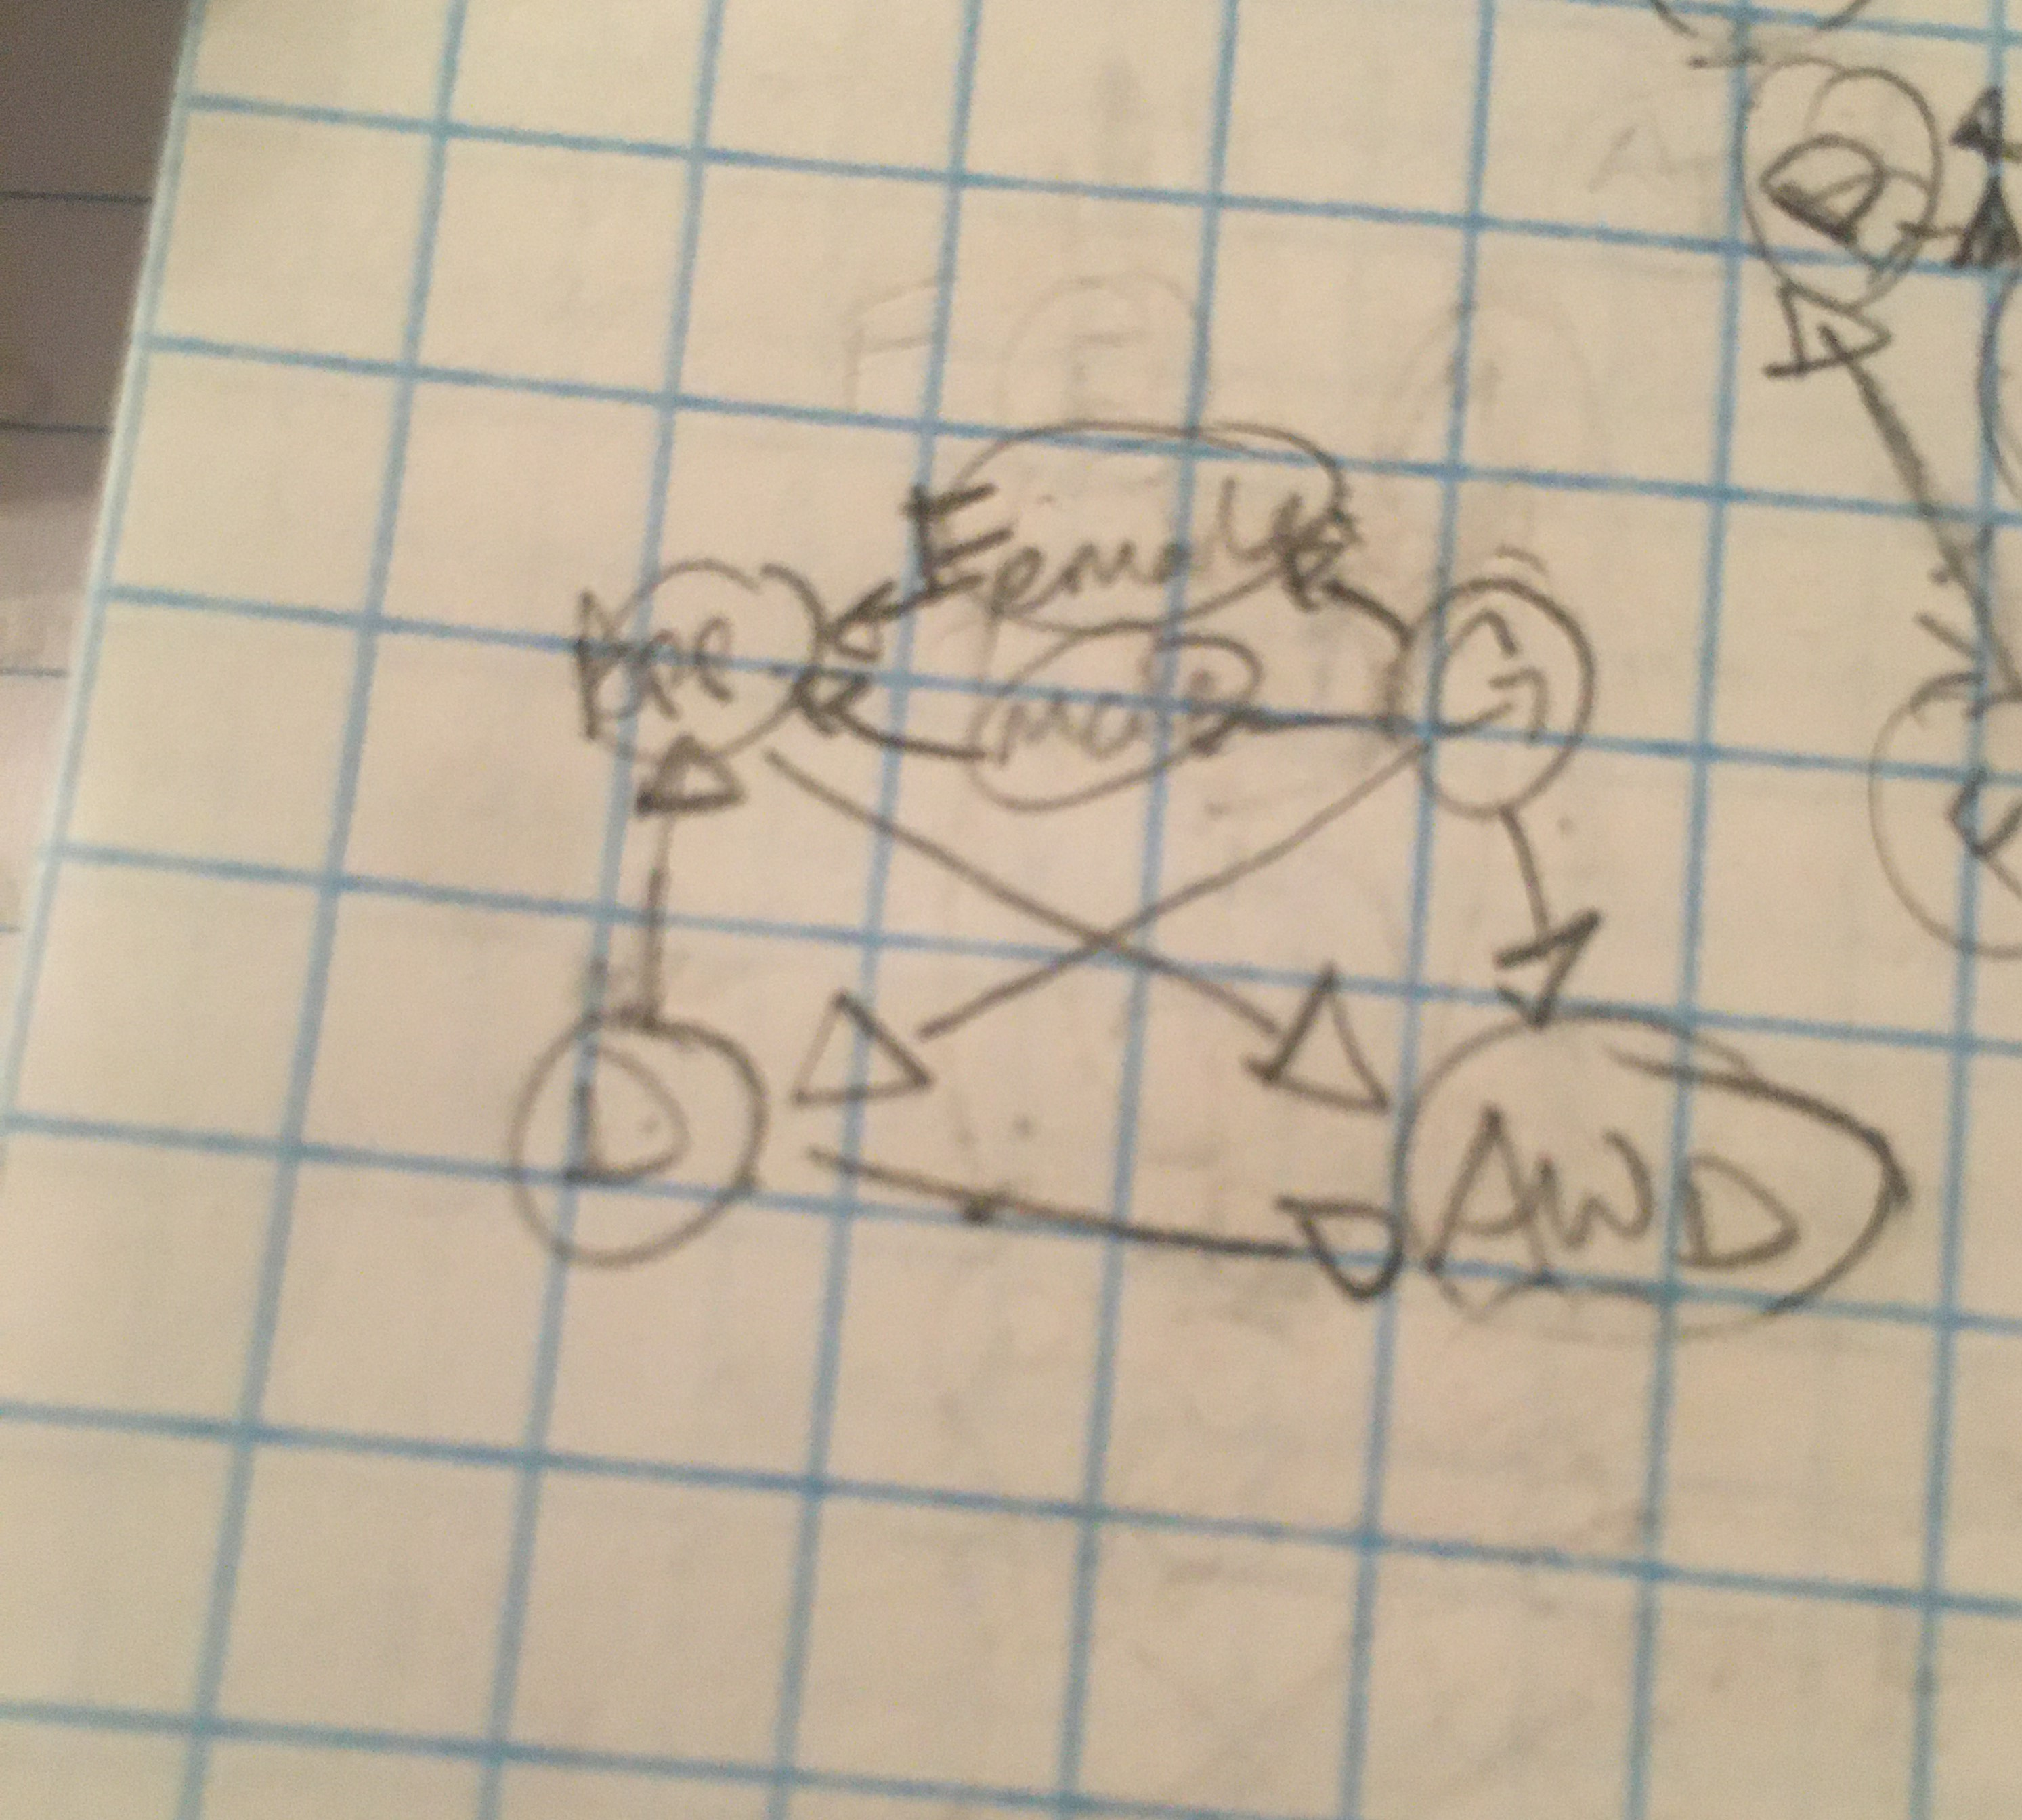

>Here is a binomial glm summary of gender conditioned on awards and discipline
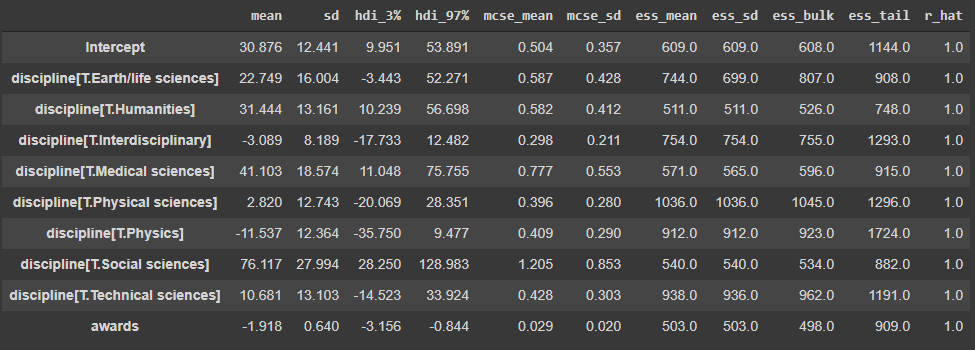

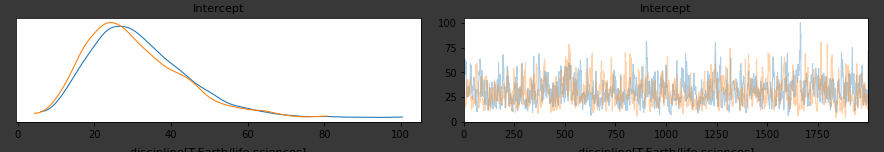


>Here is binomial glm summary of gender conditioned on awards given the discipline:




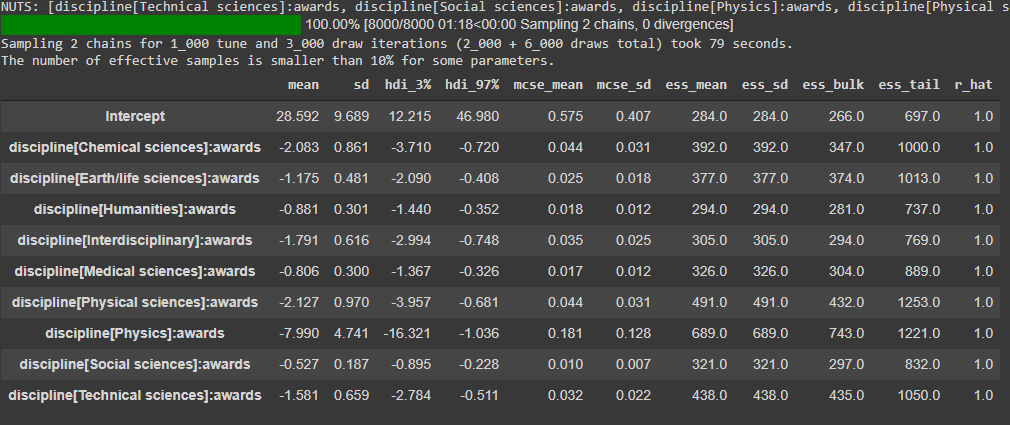

Plot of y (intercept) showing the difference between gender

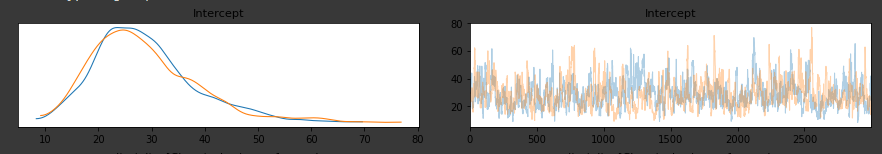

(b) Now suppose there is an un-observed confounding variable that influences both discipline and the probability of an award. Draw an updated DAG with this variable added. In this context, will conditioning on discipline give an un-confounded estimate of the direct effect of gender on funding? (You don't need to fit a new model here, but if you're having trouble thinking this through you can consider generating some fake data according to your DAG and fitting a model to it.)

>Yes, conditioning on discipline with the unobserved confounding variable might give a spurious association because dicipline might become a collidr, providing an un-confounded estimate of the direct effect of gender on funds through the backdoor condition.

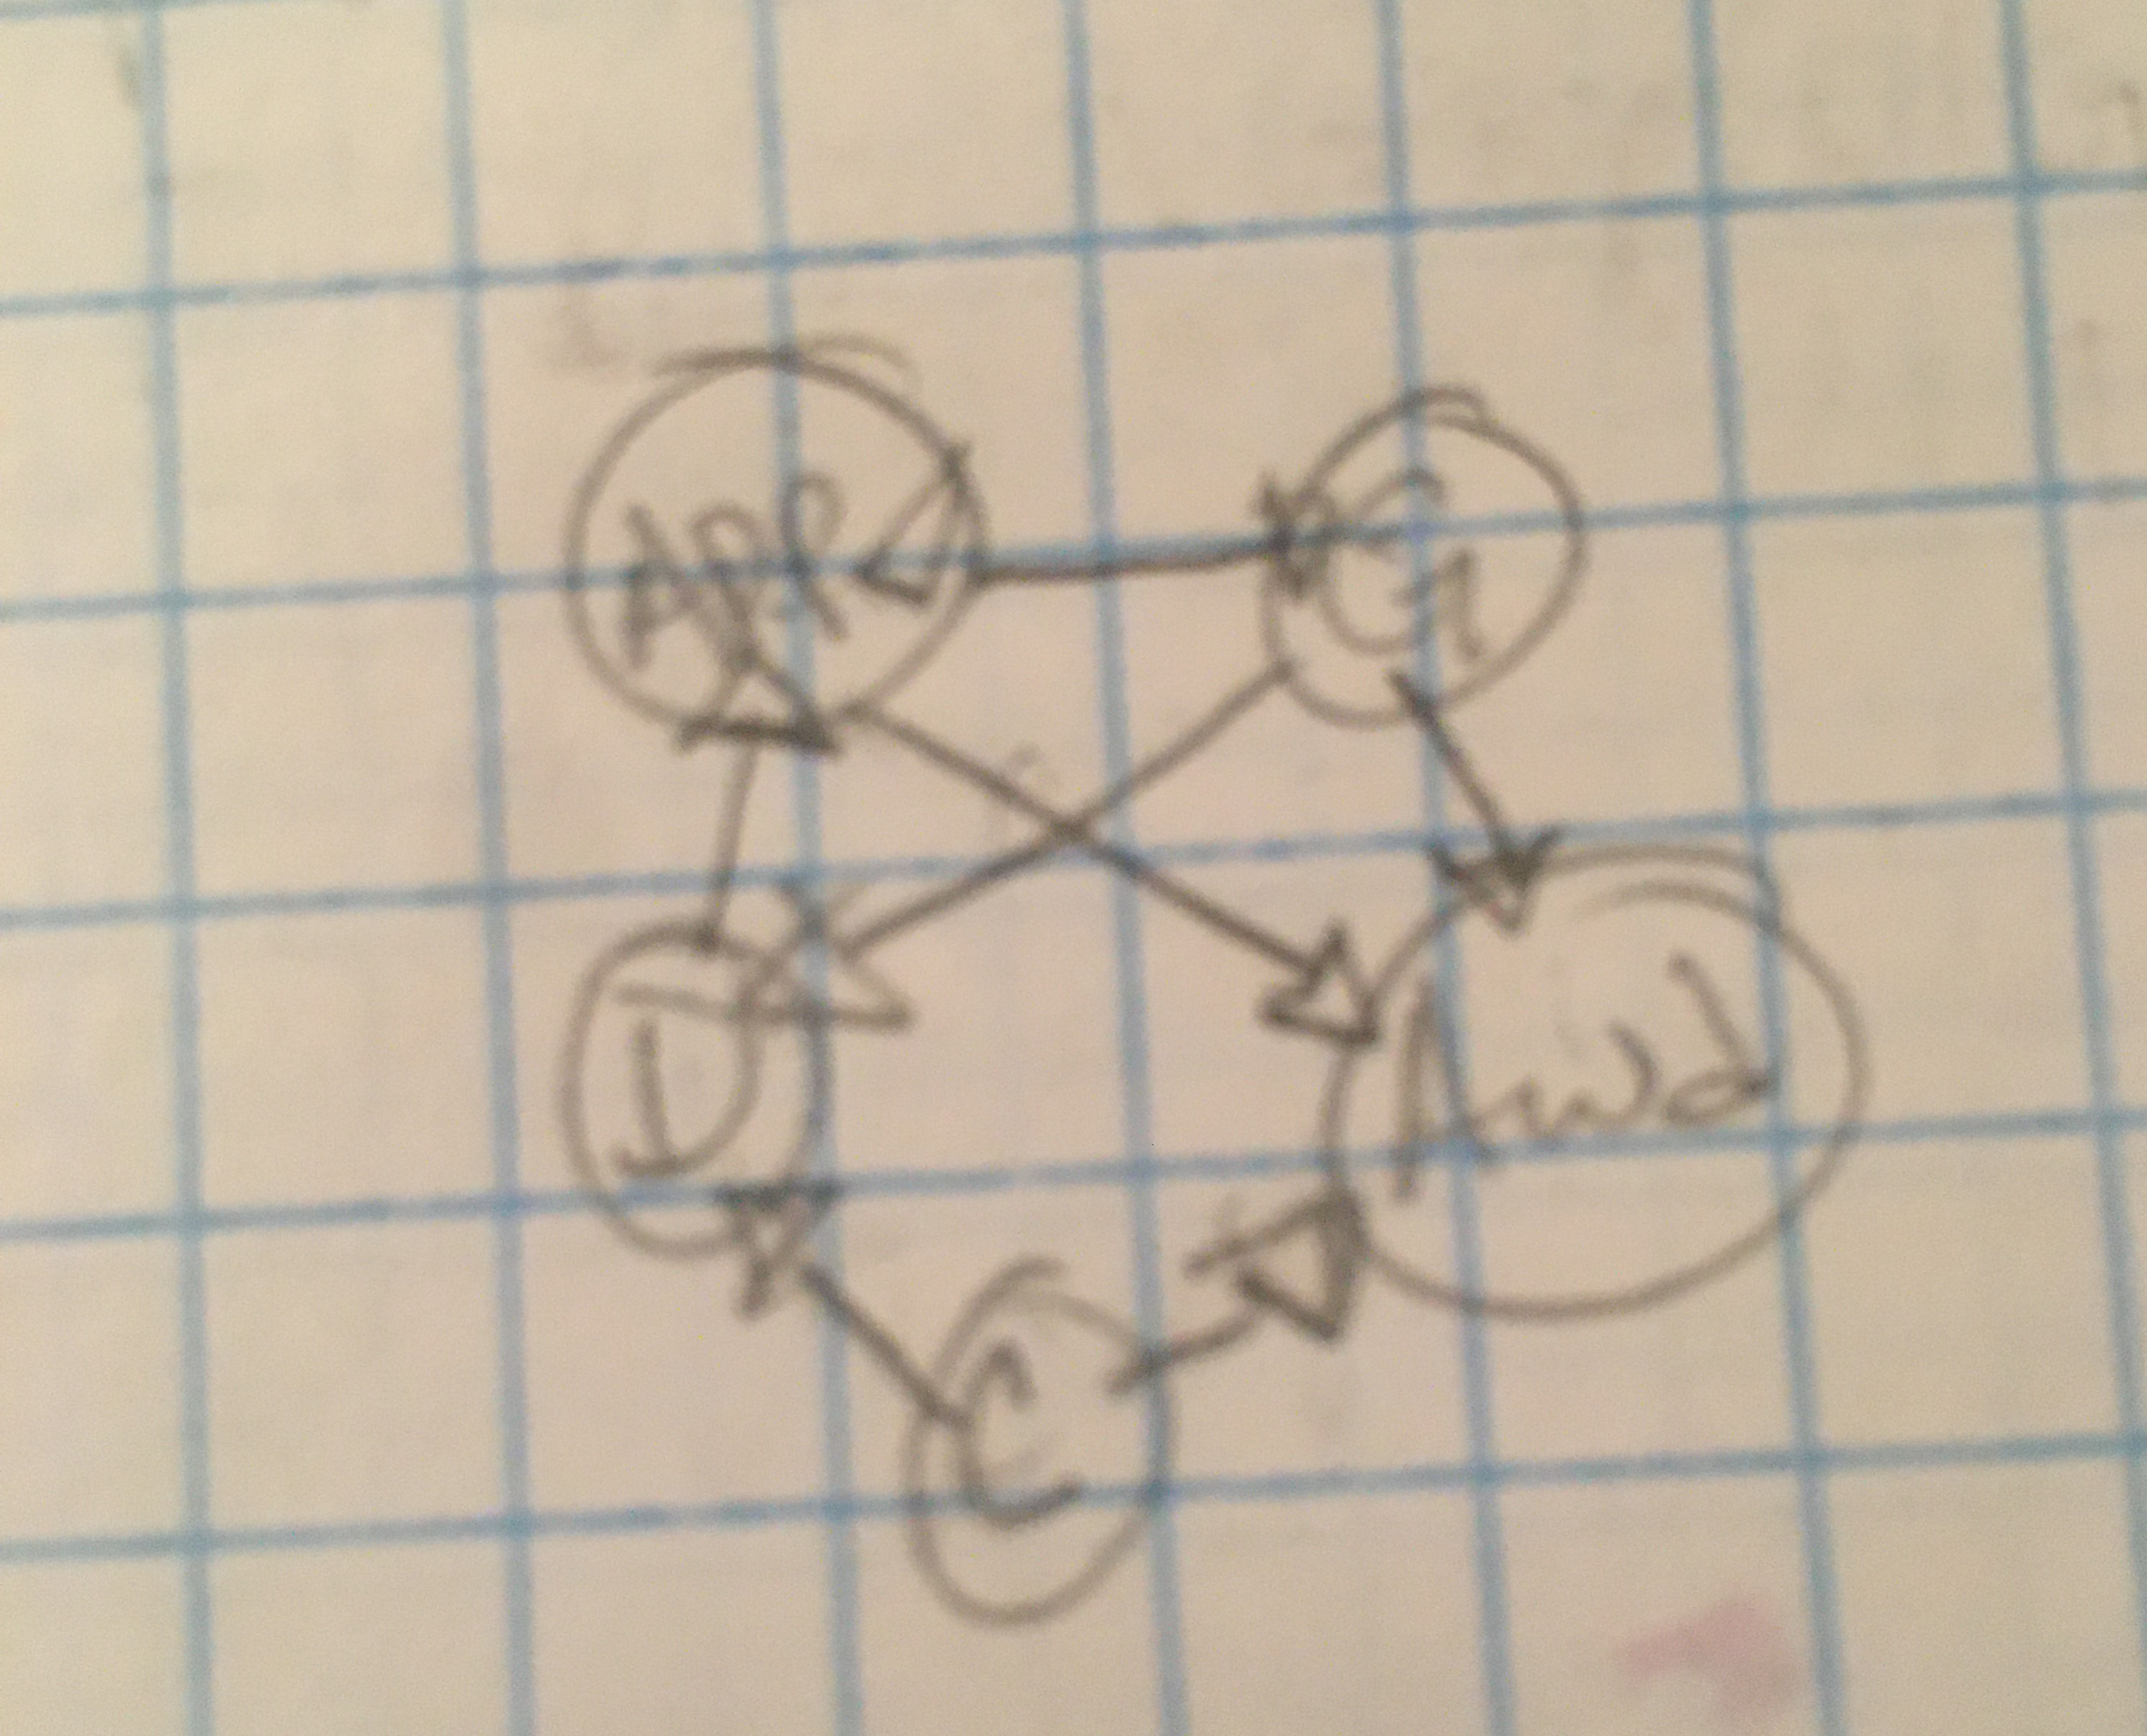

### Code for 3(a)

In [8]:
awards = pd.read_csv('NWOGrants.csv')

awards.gender[awards.gender == 'm'] = 1
awards.gender[awards.gender == 'f'] = 2

awards

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


discipline gender  applications  awards
0     Chemical sciences      1            83      22
1     Chemical sciences      2            39      10
2     Physical sciences      1           135      26
3     Physical sciences      2            39       9
4               Physics      1            67      18
5               Physics      2             9       2
6            Humanities      1           230      33
7            Humanities      2           166      32
8    Technical sciences      1           189      30
9    Technical sciences      2            62      13
10    Interdisciplinary      1           105      12
11    Interdisciplinary      2            78      17
12  Earth/life sciences      1           156      38
13  Earth/life sciences      2           126      18
14      Social sciences      1           425      65
15      Social sciences      2           409      47
16     Medical sciences      1           245      46
17     Medical sciences      2           260      29

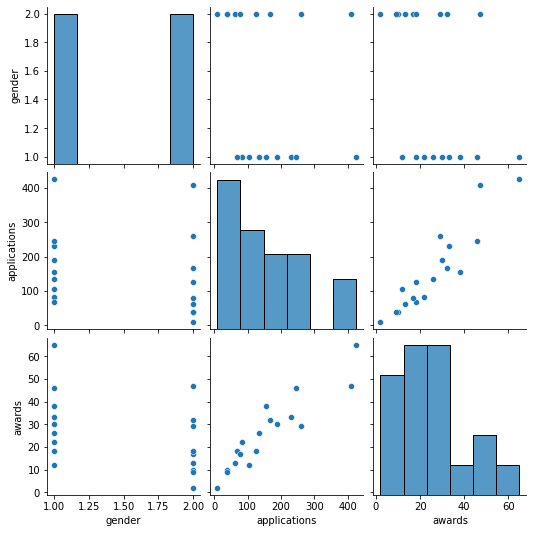

In [10]:
import seaborn
g = seaborn.pairplot(awards)

In [11]:
# this one might work
fml = 'gender ~ discipline:awards'

with pm.Model() as d_a_model:
    y = pm.glm.GLM.from_formula(formula=fml, data=awards, family=pm.glm.families.Binomial())
    trace_d_a = pm.sample(3000, tune=1000, cores=2, target_accept = .98)
    sum_d_a = pm.summary(trace_d_a)

sum_d_a

INFO (theano.gof.compilelock): Refreshing lock /root/.theano/compiledir_Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO (theano.gof.compilelock): Refreshing lock /root/.theano/compiledir_Linux-4.19.112+-x86_64-wit

Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 80 seconds.
The number of effective samples is smaller than 10% for some parameters.


mean     sd  ...  ess_tail  r_hat
Intercept                               28.338  9.861  ...     695.0   1.00
discipline[Chemical sciences]:awards    -2.065  0.863  ...     986.0   1.00
discipline[Earth/life sciences]:awards  -1.161  0.482  ...     797.0   1.00
discipline[Humanities]:awards           -0.874  0.308  ...     694.0   1.00
discipline[Interdisciplinary]:awards    -1.778  0.626  ...     792.0   1.00
discipline[Medical sciences]:awards     -0.799  0.299  ...     883.0   1.00
discipline[Physical sciences]:awards    -2.135  0.982  ...     883.0   1.01
discipline[Physics]:awards              -8.016  4.899  ...    1003.0   1.00
discipline[Social sciences]:awards      -0.523  0.191  ...     767.0   1.00
discipline[Technical sciences]:awards   -1.569  0.674  ...    1042.0   1.00

[10 rows x 11 columns]

In [ ]:
pm.plot_trace(trace_d_a)

In [12]:
fml = 'gender ~ awards + discipline'

with pm.Model() as awds_d_model:
    y = pm.glm.GLM.from_formula(formula=fml, data=awards, family=pm.glm.families.Binomial())
    trace_ad = pm.sample(2000, tune=1000, cores=2, target_accept = .98)
    sum_ad = pm.summary(trace_ad)

sum_ad

INFO (theano.gof.compilelock): Refreshing lock /root/.theano/compiledir_Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock
/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [awards, discipline[T.Technical sciences], discipline[T.Social sciences], discipline[T.Physics], discipline[T.Physical sciences], discipline[T.Medical sciences], discipline[T.Interdisciplinary], discipline[T.Humanities], discipline[T.Earth/life sciences], Intercept]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 113 seconds.
The number of effective samples is smaller than 25% for some parameters.


mean      sd  ...  ess_tail  r_hat
Intercept                          30.876  12.441  ...    1144.0    1.0
discipline[T.Earth/life sciences]  22.749  16.004  ...     908.0    1.0
discipline[T.Humanities]           31.444  13.161  ...     748.0    1.0
discipline[T.Interdisciplinary]    -3.089   8.189  ...    1293.0    1.0
discipline[T.Medical sciences]     41.103  18.574  ...     915.0    1.0
discipline[T.Physical sciences]     2.820  12.743  ...    1296.0    1.0
discipline[T.Physics]             -11.537  12.364  ...    1724.0    1.0
discipline[T.Social sciences]      76.117  27.994  ...     882.0    1.0
discipline[T.Technical sciences]   10.681  13.103  ...    1191.0    1.0
awards                             -1.918   0.640  ...     909.0    1.0

[10 rows x 11 columns]

/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e70417be0>,
      dtype=object)

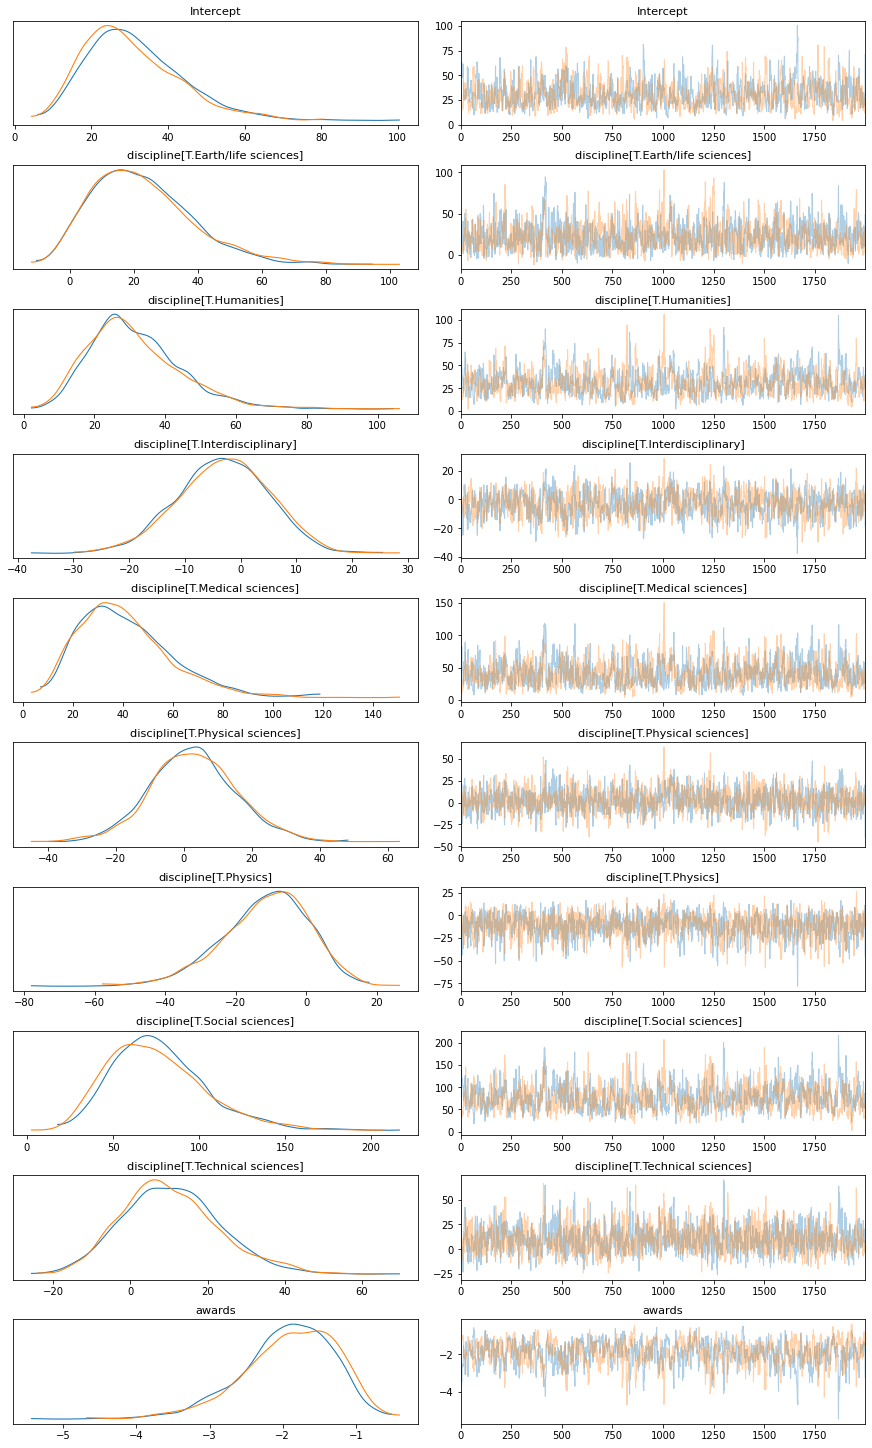

In [14]:
pm.plot_trace(trace_ad)

In [15]:
fml = 'gender ~ awards + gender:discipline'

with pm.Model() as awds_g_model:
    y = pm.glm.GLM.from_formula(formula=fml, data=awards, family=pm.glm.families.Binomial())
    trace_g_a = pm.sample(2000, tune=1000, cores=2, target_accept = .98)
    sum_agd = pm.summary(trace_g_a)

sum_agd

INFO (theano.gof.compilelock): Refreshing lock /root/.theano/compiledir_Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock
/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [awards, gender[T.2]:discipline[Technical sciences], gender[T.2]:discipline[Social sciences], gender[T.2]:discipline[Physics], gender[T.2]:discipline[Physical sciences], gender[T.2]:discipline[Medical sciences], gender[T.2]:discipline[Interdisciplinary], gender[T.2]:discipline[Humanities], gender[T.2]:discipline[Earth/life sciences], gender[T.2]:discipline[Chemical sciences], discipline[T.Technical science

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 1174 seconds.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


mean       sd  ...  ess_tail  r_hat
Intercept                                    1130.101  680.577  ...     324.0   1.03
discipline[T.Earth/life sciences]             250.297  654.683  ...     713.0   1.01
discipline[T.Humanities]                      375.458  571.493  ...     485.0   1.01
discipline[T.Interdisciplinary]              -716.367  494.593  ...     410.0   1.02
discipline[T.Medical sciences]                696.812  679.143  ...     898.0   1.00
discipline[T.Physical sciences]              -174.720  584.727  ...     450.0   1.01
discipline[T.Physics]                        -551.707  529.612  ...     514.0   1.00
discipline[T.Social sciences]                1241.786  794.238  ...     922.0   1.00
discipline[T.Technical sciences]               41.944  569.385  ...     869.0   1.00
gender[T.2]:discipline[Chemical sciences]     616.279  767.693  ...     745.0   1.01
gender[T.2]:discipline[Earth/life sciences]   705.506  757.042  ...     606.0   1.00
gender[T.2]:discipline[Humanities]           1272.254  671.573  ...     458.0   1.02
gender[T.2]:discipline[Interdisciplinary]    1295.552  576.225  ...     496.0   1.00
gender[T.2]:discipline[Medical sciences]      894.677  734.725  ...     807.0   1.01
gender[T.2]:discipline[Physical sciences]     624.209  791.874  ...     658.0   1.00
gender[T.2]:discipline[Physics]               610.971  798.572  ...     647.0   1.01
gender[T.2]:discipline[Social sciences]      1353.226  782.942  ...     631.0   1.02
gender[T.2]:discipline[Technical sciences]    656.891  757.231  ...    1089.0   1.01
awards                                        -66.704   27.055  ...     313.0   1.03

[19 rows x 11 columns]

In [ ]:
pm.plot_trace(trace_g_a)

In [ ]:
# import seaborn
# plt.figure(figsize=(12,10))
# seaborn.jointplot(trace_g_a['gender'], trace_g_a['awards'], kind="hex", color="#4CB391")
# plt.xlabel("beta_gender")
# plt.ylabel("beta_awards");

In [ ]:
# fml = 'gender ~ gender:discipline'

# with pm.Model() as disc_g_model:
#     y = pm.glm.GLM.from_formula(formula=fml, data=awards, family=pm.glm.families.Binomial())
#     trace_g_d = pm.sample(1000, tune=1000, cores=2, target_accept = .98)
#     sum_dg = pm.summary(trace_g_a)

# sum_dg 

In [ ]:
# fml = 'nsneeze ~ alcohol + nomeds + alcohol:nomeds'

# fml = 'gender ~ awards:discipline'

# with pm.Model() as awds_model:
#     y = pm.glm.GLM.from_formula(formula=fml, data=awards, family=pm.glm.families.Binomial())
#     trace_glm = pm.sample(3000, tune=1000, cores=2, target_accept = .98) 

In [ ]:
# pm.summary(trace_glm)

In [ ]:
# pm.plot_trace(trace_glm) 


In [ ]:
# with pm.Model() as awards_model:
#     # Hyperparameters
#     eta = pm.Normal('eta', 0, 1) #, shape = 18)
#     tau = pm.HalfCauchy('tau', 5)
#     g = pm.Normal('m', mu = 0, sigma = 5)

#     # x = pm.HalfCauchy('x', 5)
#     # a = pm.Normal('a', 0, x) #, shape = 8)
#     # b = pm.Normal('b', mu = 0, sigma = .5)
    
#     # Parameter vector
#     # p = g + tau * eta
#     # logit = pm.logit(p=p)
#     # l = pm.LogitNormal('l', )
#     theta = pm.Normal('theta', mu = g, sigma = tau) #, shape = 18)
#     # print(logit)
  
#     # Data likelihood
#     y_obs = pm.Binomial('y_obs', p=pm.logit(theta), n=len(awards['awards'])) #, observations = awards['gender'])
    
#     trace = pm.sample(2000, init = 'advi', target_accept = 0.95)

## 4. (Hierarchical model; WAIC.)
The data set reedfrogs.csv contains data from an experiment on the survival of reed frog tadpoles. Each row represents a "tank", an environment in which some tadpoles are hatched. The outcome variable of interest is the proportion of tadpoles that survive to maturity.

A simple un-pooled model would estimate a separate survival count for each tank:

$s_i \sim Binomial(n_i, p_i)$

$logit(p_i) = \alpha_i$

$\alpha_i \sim Normal(0, 5)$

(a) Specify a varying-intercepts model that applies normal and half-Cauchy hyperpriors for the mean and standard deviation of the prior distribution for $\alpha_i$. Fit this model along with the un-pooled model above.

>Varying Intercepts Model:

>$y_i \sim Binomial(p, Frogs_{Surv}) $

>$\mu_i \sim \alpha + \sigma$

>$logit(p) \sim (\mu + \beta(survival))$

>$\beta \sim Normal(0, 1) $

>$\alpha \sim Normal(0, 2) $

>$\sigma \sim HalfCauchy(3) $


<!-- with pm.Model() as vi__pred_model:
    a = pm.Normal('a', 0, 2) #1 or 2
    b = pm.Normal('b', 0, 1) #5? or 1?
    sigma = pm.HalfCauchy('sigma', 3) #5?
    surv_intercept = pm.Normal('surv_intercept', a, sigma, shape=48)
    p = pm.math.invlogit(surv_intercept + b * frogs.surv + b*frogs.pred)
    survived = pm.Binomial('survived', p=p, n=frogs.sum(axis=1), observed = frogs.surv)
    
    trace_vi__pred = pm.sample(2000, target_accept = 0.98, tune = 3500)
    summary_vi__pred = pm.summary(trace_vi__pred)

summary_vi__pred -->


(b) Add to the varying-intercepts model by including pred, the presence of  predators, as a predictor. Compare all three models with WAIC. Notice that the variance parameter for the varying intercepts is much smaller for the model including predation than the model without it. Can you explain why?

>Varying Intercepts Model with Predator:

>$y_i \sim Binomial(p, Frogs_{Surv}) $

>$\mu_i \sim \alpha + \sigma$

>$logit(p) \sim (\mu + \beta(survival) + \beta(predator))$

>$\beta \sim Normal(0, 1) $

>$\alpha \sim Normal(0, 2) $

>$\sigma \sim HalfCauchy(3) $

> The variance paramter for the predation model is smaller because there are less predatory frogs being observed compared to the total number of frogs.


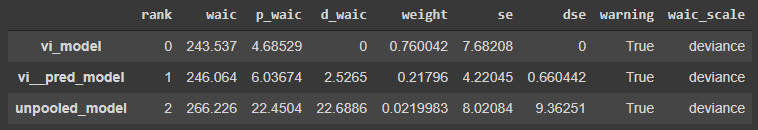

## Code question 4 (a/b)

In [3]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

frogs = pd.read_csv('reedfrogs.csv',sep=';')
frogs[['pred']] = OrdinalEncoder(dtype=np.int64).fit_transform(frogs[['pred']])

frogs.tail()

density  pred   size  surv  propsurv
43       35     1    big    14  0.400000
44       35     1  small    22  0.628571
45       35     1  small    12  0.342857
46       35     1  small    31  0.885714
47       35     1  small    17  0.485714

In [102]:
#above unpooled model:

with pm.Model() as unpooled_model:
  alpha  = 1 #pm.Normal('alpha', 0, 1)
  beta = 1
  # pm.logit(frogs['propsurv']) = alpha
  tank = pm.Beta('tank', alpha, beta, shape = 48) #theta
  s_i = pm.Binomial('s_i', p=tank, n=frogs.sum(axis=1), observed = frogs.surv.values)

  unpooled_model_trace = pm.sample(1000)
  unpooled_model_sum = pm.summary(unpooled_model_trace)
  
unpooled_model_sum

/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [tank]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 5 seconds.


mean     sd  hdi_3%  hdi_97%  ...  ess_sd  ess_bulk  ess_tail  r_hat
tank[0]   0.476  0.106   0.259    0.655  ...  3552.0    3564.0    1549.0   1.00
tank[1]   0.478  0.099   0.297    0.671  ...  4455.0    4611.0    1158.0   1.00
tank[2]   0.421  0.104   0.230    0.611  ...  5160.0    5329.0    1382.0   1.00
tank[3]   0.478  0.102   0.290    0.664  ...  4125.0    4461.0    1258.0   1.00
tank[4]   0.474  0.108   0.279    0.680  ...  4360.0    5067.0    1528.0   1.00
tank[5]   0.478  0.105   0.289    0.688  ...  3122.0    4035.0    1134.0   1.00
tank[6]   0.477  0.102   0.291    0.671  ...  4252.0    4863.0    1326.0   1.00
tank[7]   0.476  0.111   0.273    0.681  ...  4459.0    4965.0    1149.0   1.00
tank[8]   0.292  0.108   0.108    0.496  ...  3854.0    4744.0    1353.0   1.00
tank[9]   0.457  0.102   0.266    0.648  ...  3788.0    4581.0    1384.0   1.00
tank[10]  0.403  0.109   0.195    0.592  ...  4371.0    5535.0    1565.0   1.00
tank[11]  0.368  0.108   0.172    0.579  ...  3461.0    3936.0    1324.0   1.00
tank[12]  0.402  0.109   0.212    0.614  ...  4278.0    4887.0    1255.0   1.00
tank[13]  0.335  0.108   0.137    0.529  ...  3188.0    3697.0    1372.0   1.00
tank[14]  0.455  0.105   0.246    0.636  ...  4874.0    5318.0    1426.0   1.00
tank[15]  0.454  0.105   0.260    0.655  ...  5000.0    5374.0    1328.0   1.00
tank[16]  0.490  0.068   0.355    0.608  ...  5585.0    5914.0    1522.0   1.00
tank[17]  0.478  0.070   0.352    0.610  ...  5420.0    5627.0    1489.0   1.01
tank[18]  0.470  0.071   0.335    0.606  ...  4351.0    4757.0    1411.0   1.00
tank[19]  0.490  0.068   0.362    0.612  ...  5090.0    5210.0    1625.0   1.00
tank[20]  0.479  0.071   0.359    0.621  ...  5216.0    5018.0    1504.0   1.00
tank[21]  0.479  0.071   0.352    0.623  ...  4727.0    4765.0    1377.0   1.00
tank[22]  0.480  0.071   0.349    0.618  ...  5186.0    5672.0    1246.0   1.00
tank[23]  0.457  0.073   0.311    0.586  ...  4212.0    4262.0    1318.0   1.00
tank[24]  0.207  0.067   0.083    0.326  ...  3988.0    5909.0    1453.0   1.00
tank[25]  0.344  0.073   0.203    0.474  ...  4364.0    5381.0    1475.0   1.00
tank[26]  0.156  0.063   0.040    0.266  ...  2852.0    4293.0     959.0   1.00
tank[27]  0.271  0.071   0.142    0.407  ...  3565.0    4068.0    1394.0   1.00
tank[28]  0.342  0.072   0.204    0.469  ...  3385.0    3504.0    1464.0   1.00
tank[29]  0.438  0.070   0.315    0.574  ...  5640.0    6073.0    1279.0   1.00
tank[30]  0.251  0.075   0.110    0.388  ...  4098.0    6602.0    1351.0   1.00
tank[31]  0.289  0.073   0.169    0.434  ...  5449.0    5604.0    1457.0   1.00
tank[32]  0.491  0.059   0.386    0.603  ...  3803.0    3749.0    1498.0   1.00
tank[33]  0.485  0.061   0.374    0.602  ...  5248.0    5468.0    1350.0   1.00
tank[34]  0.485  0.062   0.376    0.598  ...  5186.0    5091.0    1464.0   1.00
tank[35]  0.470  0.060   0.362    0.583  ...  5193.0    5286.0    1525.0   1.00
tank[36]  0.472  0.060   0.357    0.584  ...  4388.0    5825.0    1339.0   1.00
tank[37]  0.493  0.060   0.371    0.596  ...  4748.0    5049.0    1387.0   1.00
tank[38]  0.486  0.059   0.375    0.596  ...  3747.0    3832.0    1304.0   1.01
tank[39]  0.477  0.061   0.364    0.590  ...  5040.0    5808.0    1394.0   1.00
tank[40]  0.119  0.050   0.034    0.210  ...  2967.0    4508.0    1530.0   1.00
tank[41]  0.261  0.060   0.154    0.373  ...  4182.0    4872.0    1489.0   1.00
tank[42]  0.274  0.060   0.160    0.380  ...  4269.0    4588.0    1381.0   1.00
tank[43]  0.288  0.063   0.168    0.407  ...  3479.0    4375.0    1322.0   1.00
tank[44]  0.384  0.065   0.258    0.498  ...  4704.0    5128.0    1318.0   1.00
tank[45]  0.260  0.061   0.156    0.373  ...  4669.0    5559.0    1306.0   1.00
tank[46]  0.466  0.060   0.360    0.581  ...  4108.0    4534.0    1356.0   1.00
tank[47]  0.327  0.062   0.201    0.439  ...  4368.0    4950.0    1313.0   1.00

[48 rows x 11 columns]

In [50]:
# ppc = pm.sample_posterior_predictive(unpooled_model_trace, 10, model = unpooled_model)
# ppc

/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
arviz.data.io_pymc3 - WARNING - posterior predictive variable s_i's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


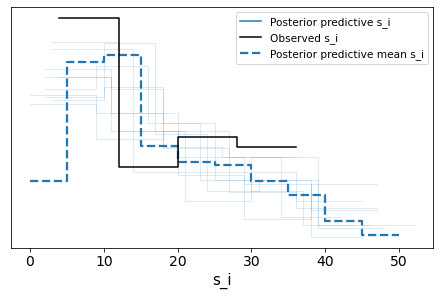

In [51]:
frog_data = az.from_pymc3(unpooled_model_trace, posterior_predictive=ppc)
az.plot_ppc(frog_data);

In [ ]:
with pm.Model() as indi_model:
    # Priors
    asurv = pm.Normal('asurv', 0, 0.5, shape = 48)
    # apred = pm.Normal('apred', 0, 0.5, shape = 2)
    alpha = pm.Normal('alpha', 0, 0.2)
    sigma = pm.HalfCauchy('sigma', 5)
    
    # Model equation
    mu = alpha + asurv[frogs['surv'].values] # + apred[frogs['pred'].values] # use .values here to avoid annoying theano warnings
    
    # Observation model
    score = pm.Normal('score', mu = mu, sigma = sigma, observed = frogs['surv']) #frogs['propsurv'])
    
    # Sampling
    indi_model_trace = pm.sample(2000, target_accept = 0.95)
    indi_model_sum = pm.summary(indi_model_trace)

indi_model_sum

In [ ]:
ppc_surv = pm.sample_posterior_predictive(indi_model_trace, 10, model = indi_model)

frog_surv = az.from_pymc3(indi_model_trace, posterior_predictive=ppc)
az.plot_ppc(frog_surv);

In [95]:
with pm.Model() as indicator_model:
    # Priors
    asurv = pm.Normal('asurv', 0, 0.5, shape = 48)
    apred = pm.Normal('apred', 0, 0.5, shape = 2)
    alpha = pm.Normal('alpha', 0, 0.2)
    sigma = pm.HalfCauchy('sigma', 5)
    
    # Model equation
    mu = alpha + asurv[frogs['surv'].values] + apred[frogs['pred'].values] # use .values here to avoid annoying theano warnings
    
    # Observation model
    score = pm.Normal('score', mu = mu, sigma = sigma, observed = frogs['surv'])
    
    # Sampling
    indicator_model_trace = pm.sample(2000, target_accept = 0.95)
    indicator_model_sum = pm.summary(indicator_model_trace)

INFO (theano.gof.compilelock): Refreshing lock /root/.theano/compiledir_Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock
/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, alpha, apred, asurv]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 22 seconds.


In [ ]:
indicator_model_sum


In [97]:
waic_comp = az.compare({'unpooled_model':unpooled_model_trace, 'indicator_model':indicator_model_trace, 'indi_model':indi_model_trace}, ic='waic', scale='deviance')
waic_comp

/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/arviz/stats/stats.py:1427: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "
/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/us

rank     waic    p_waic  ...      dse warning waic_scale
unpooled_model     0  264.518   21.8437  ...        0    True   deviance
indicator_model    1  418.812  0.674148  ...  4.52964   False   deviance
indi_model         2  420.018  0.587192  ...  4.44685   False   deviance

[3 rows x 9 columns]

In [101]:
waic_comp2 = az.compare({'unpooled_model':unpooled_model_trace, 'vi_model':vi_trace, 'vi_pred_model':pred_trace}, ic='waic', scale='deviance')
waic_comp2

/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/arviz/stats/stats.py:1427: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "
/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/us

rank     waic   p_waic  ...      dse warning waic_scale
unpooled_model    0  264.518  21.8437  ...        0    True   deviance
vi_pred_model     1  339.709  0.13757  ...  4.79122   False   deviance
vi_model          2  406.543  10.4041  ...  6.75415    True   deviance

[3 rows x 9 columns]

In [ ]:
with pm.Model() as vi_pred_model:
    # Hyperparameters
    eta = pm.Normal('eta', 0, 1, shape = 48)
    tau = pm.HalfCauchy('tau', 5)
    m = pm.Normal('m', mu = 0, sigma = 5)
    
    # Parameter vector
    
    theta = pm.Deterministic('theta', m + tau * eta)
    # theta = pm.Normal('theta', mu = m, sigma = tau, shape = 48)
    
    # Data likelihood
    si_vi= pm.Normal('y_obs', mu = theta, sigma = frogs['surv'], observed = frogs['pred']) #schools['Effect'])
    # si_vi = pm.Binomial('si_vi', p = theta, n = frogs.sum(axis=1), observed = frogs.surv.values) # mu = theta, sigma = schools['SE'], observed = schools['Effect'])

    pred_trace = pm.sample(2000, target_accept = 0.95)
    sum_pred = pm.summary(pred_trace)

sum_pred


In [99]:
with pm.Model() as vi_model:
    # Hyperparameters
    eta = pm.Normal('eta', 0, 1, shape = 48)
    tau = pm.HalfCauchy('tau', 5)
    m = pm.Normal('m', mu = 0, sigma = 5)
    
    # b= pm.Normal('b',0, .5)
    # a = pm.Normal('a', 0, .2, shape = 48)
    # sig = pm.HalfCauchy('sig',5)

    # mu = pm.Deterministic('mu', a +b*sig)   
    # Parameter vector
    
    theta = pm.Deterministic('theta', m + tau * eta)
    # theta = pm.Normal('theta', mu = m, sigma = tau, shape = 48)
    
    # Data likelihood
    si_vi= pm.Normal('y_obs', mu = theta, sigma = frogs['surv'], observed = frogs.sum(axis=1)) #schools['Effect'])
    # si_vi = pm.Binomial('si_vi', p = theta, n = frogs.sum(axis=1), observed = frogs.surv.values) # mu = theta, sigma = schools['SE'], observed = schools['Effect'])

    vi_trace = pm.sample(2000, target_accept = 0.95)

/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [m, tau, eta]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 15 seconds.


In [ ]:
vi_sum = pm.summary(vi_trace)
vi_sum

In [ ]:
    # Hyperparameters
    eta = pm.Normal('eta', 0, 1, shape = 48)
    tau = pm.HalfCauchy('tau', 5)
    m = pm.Normal('m', mu = 0, sigma = tau)

def logp_ab(value):
  '''Transformation for the hyperprior. Theano tensor magic.'''
  return tt.log(tt.pow(tt.sum(value), -5/2))

with pm.Model() as hierarchical_model:
    # Uninformative prior for alpha and beta
    ab = pm.HalfFlat('ab',
                     shape=2,
                     testval=np.asarray([1., 1.]))
    pm.Potential('p(a, b)', logp_ab(ab))

    # Distributions for theta
    theta = pm.Beta('theta', alpha=ab[0], beta=ab[1], shape = 48)
    
    # Data distribution
    # y_obs = pm.Binomial('y_obs', p = theta, observed = df.bicycles, n=df.sum(axis=1))
    si_vi = pm.Binomial('si_vi', p = theta, n = frogs.sum(axis=1), observed = frogs.surv.values) # mu = theta, sigma = schools['SE'], observed = schools['Effect'])

    trace_h = pm.sample(2000, target_accept = 0.95)

In [ ]:
pm.summary(trace)

/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:1691: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
arviz.data.io_pymc3 - WARNING - posterior predictive variable si_vi's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


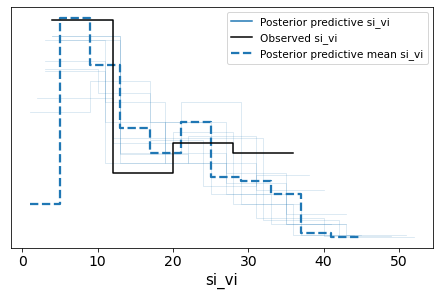

In [59]:
ppc = pm.sample_posterior_predictive(trace, 10, model = hierarchical_model)

frog_data = az.from_pymc3(trace, posterior_predictive=ppc)
az.plot_ppc(frog_data);

In [ ]:
# -- compute a vector of predictions by intercept + slope * pred, and then use that in your likelihood.
#  since we're predicting a binary categorical outcome (survived/died) a binomial GLM is somewhat more appropriate than a linear regression with a normal likelihood.

with pm.Model() as variable_i_model:
    # Hyperparameters
    eta = pm.Normal('eta', 0, 1, shape = 48)
    tau = pm.HalfCauchy('tau', 5)
    m = pm.Normal('m', mu = 0, sigma = 5)

    #model equation
    mu = m + eta[frogs['surv'].values] # + apred[frogs['pred'].values] 

    surv = pm.Binomial('surv', n=frogs.sum(axis=1), p = mu, observed = frogs.surv)

    variable_i_trace = pm.sample(2000, target_accept = 0.95)
    variable_i_sum = pm.summary(variable_i_trace)

variable_i_sum


In [4]:
frogs.head()

density  pred   size  surv  propsurv
0       10     0    big     9       0.9
1       10     0    big    10       1.0
2       10     0    big     7       0.7
3       10     0    big    10       1.0
4       10     0  small     9       0.9

In [100]:
with pm.Model() as vi_model:
    a = pm.Normal('a', 0, 2) #1 or 2
    b = pm.Normal('b', 0, 1) #5? or 1?
    sigma = pm.HalfCauchy('sigma', 3) #5?
    surv_intercept = pm.Normal('surv_intercept', a, sigma, shape=48)
    p = pm.math.invlogit(surv_intercept + b * frogs.surv) # + b*frogs.pred
    survived = pm.Binomial('survived', p=p, n=frogs.sum(axis=1), observed = frogs.surv)
    
    trace_vi = pm.sample(2000, target_accept = 0.98, tune = 3500)
    summary_vi = pm.summary(trace_vi)

summary_vi

/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [surv_intercept, sigma, b, a]


Sampling 2 chains for 3_500 tune and 2_000 draw iterations (7_000 + 4_000 draws total) took 140 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


mean     sd  hdi_3%  ...  ess_bulk  ess_tail  r_hat
a                  -1.019  0.102  -1.209  ...     110.0     325.0   1.02
b                   0.031  0.005   0.022  ...     127.0     333.0   1.02
surv_intercept[0]  -0.989  0.144  -1.248  ...     201.0     721.0   1.01
surv_intercept[1]  -0.986  0.148  -1.256  ...     202.0     711.0   1.01
surv_intercept[2]  -1.004  0.142  -1.273  ...     221.0     726.0   1.01
surv_intercept[3]  -0.987  0.146  -1.264  ...     193.0     690.0   1.01
surv_intercept[4]  -0.985  0.149  -1.264  ...     190.0     774.0   1.01
surv_intercept[5]  -0.986  0.150  -1.267  ...     216.0     593.0   1.01
surv_intercept[6]  -0.985  0.150  -1.255  ...     191.0     678.0   1.01
surv_intercept[7]  -0.988  0.146  -1.250  ...     197.0     703.0   1.01
surv_intercept[8]  -1.022  0.148  -1.284  ...     222.0     848.0   1.01
surv_intercept[9]  -0.993  0.147  -1.263  ...     207.0     778.0   1.01
surv_intercept[10] -1.004  0.147  -1.278  ...     204.0     806.0   1.01
surv_intercept[11] -1.011  0.146  -1.271  ...     191.0     919.0   1.01
surv_intercept[12] -1.004  0.142  -1.271  ...     195.0     786.0   1.01
surv_intercept[13] -1.014  0.144  -1.279  ...     209.0     917.0   1.01
surv_intercept[14] -0.994  0.146  -1.259  ...     200.0     565.0   1.01
surv_intercept[15] -0.990  0.145  -1.249  ...     203.0     918.0   1.01
surv_intercept[16] -0.991  0.141  -1.255  ...     187.0     672.0   1.01
surv_intercept[17] -0.992  0.143  -1.260  ...     181.0     664.0   1.01
surv_intercept[18] -0.996  0.141  -1.263  ...     184.0     660.0   1.01
surv_intercept[19] -0.997  0.143  -1.253  ...     183.0     726.0   1.01
surv_intercept[20] -0.994  0.142  -1.266  ...     183.0     643.0   1.01
surv_intercept[21] -0.995  0.141  -1.260  ...     193.0     633.0   1.01
surv_intercept[22] -0.993  0.140  -1.244  ...     170.0     628.0   1.02
surv_intercept[23] -0.997  0.141  -1.254  ...     193.0     656.0   1.01
surv_intercept[24] -1.055  0.142  -1.320  ...     182.0     701.0   1.00
surv_intercept[25] -1.029  0.140  -1.292  ...     196.0     785.0   1.01
surv_intercept[26] -1.067  0.149  -1.354  ...     173.0     562.0   1.01
surv_intercept[27] -1.043  0.139  -1.333  ...     182.0     896.0   1.01
surv_intercept[28] -1.025  0.136  -1.274  ...     179.0     870.0   1.01
surv_intercept[29] -1.002  0.144  -1.271  ...     199.0     628.0   1.01
surv_intercept[30] -1.045  0.140  -1.293  ...     182.0     665.0   1.01
surv_intercept[31] -1.039  0.142  -1.294  ...     192.0     756.0   1.01
surv_intercept[32] -1.029  0.144  -1.310  ...     184.0     736.0   1.01
surv_intercept[33] -1.028  0.144  -1.289  ...     186.0     839.0   1.01
surv_intercept[34] -1.028  0.144  -1.305  ...     179.0     753.0   1.01
surv_intercept[35] -1.027  0.137  -1.305  ...     191.0     784.0   1.01
surv_intercept[36] -1.028  0.141  -1.299  ...     185.0     676.0   1.01
surv_intercept[37] -1.033  0.144  -1.294  ...     177.0     687.0   1.01
surv_intercept[38] -1.031  0.143  -1.310  ...     179.0     649.0   1.01
surv_intercept[39] -1.028  0.145  -1.296  ...     179.0     694.0   1.01
surv_intercept[40] -1.097  0.159  -1.402  ...     154.0     514.0   1.01
surv_intercept[41] -1.061  0.142  -1.333  ...     160.0     589.0   1.01
surv_intercept[42] -1.059  0.142  -1.319  ...     172.0     838.0   1.01
surv_intercept[43] -1.055  0.139  -1.311  ...     172.0     710.0   1.01
surv_intercept[44] -1.039  0.142  -1.302  ...     187.0     692.0   1.01
surv_intercept[45] -1.063  0.144  -1.327  ...     154.0     631.0   1.01
surv_intercept[46] -1.030  0.141  -1.302  ...     176.0     683.0   1.01
surv_intercept[47] -1.047  0.139  -1.304  ...     171.0     752.0   1.01
sigma               0.095  0.056   0.011  ...      88.0     127.0   1.01

[51 rows x 11 columns]

In [83]:
with pm.Model() as vi__pred_model:
    a = pm.Normal('a', 0, 2) #1 or 2
    b = pm.Normal('b', 0, 1) #5? or 1?
    sigma = pm.HalfCauchy('sigma', 3) #5?
    surv_intercept = pm.Normal('surv_intercept', a, sigma, shape=48)
    p = pm.math.invlogit(surv_intercept + b * frogs.surv + b*frogs.pred)
    survived = pm.Binomial('survived', p=p, n=frogs.sum(axis=1), observed = frogs.surv)
    
    trace_vi__pred = pm.sample(2000, target_accept = 0.98, tune = 3500)
    summary_vi__pred = pm.summary(trace_vi__pred)

summary_vi__pred

/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [surv_intercept, sigma, b, a]


Sampling 2 chains for 3_500 tune and 2_000 draw iterations (7_000 + 4_000 draws total) took 188 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.


mean     sd  hdi_3%  ...  ess_bulk  ess_tail  r_hat
a                  -1.060  0.114  -1.286  ...      94.0     134.0   1.02
b                   0.032  0.005   0.023  ...     112.0     173.0   1.01
surv_intercept[0]  -1.016  0.177  -1.352  ...     150.0     397.0   1.01
surv_intercept[1]  -1.010  0.175  -1.324  ...     144.0     331.0   1.01
surv_intercept[2]  -1.031  0.168  -1.332  ...     164.0     472.0   1.01
surv_intercept[3]  -1.012  0.175  -1.324  ...     153.0     348.0   1.01
surv_intercept[4]  -1.016  0.173  -1.330  ...     153.0     333.0   1.01
surv_intercept[5]  -1.014  0.178  -1.349  ...     159.0     342.0   1.01
surv_intercept[6]  -1.011  0.175  -1.347  ...     145.0     287.0   1.01
surv_intercept[7]  -1.012  0.175  -1.348  ...     147.0     299.0   1.01
surv_intercept[8]  -1.067  0.167  -1.372  ...     223.0     564.0   1.00
surv_intercept[9]  -1.022  0.170  -1.324  ...     160.0     339.0   1.01
surv_intercept[10] -1.039  0.169  -1.336  ...     169.0     474.0   1.01
surv_intercept[11] -1.049  0.171  -1.371  ...     209.0     744.0   1.01
surv_intercept[12] -1.039  0.166  -1.336  ...     172.0     413.0   1.01
surv_intercept[13] -1.056  0.165  -1.366  ...     201.0     650.0   1.01
surv_intercept[14] -1.022  0.170  -1.331  ...     148.0     331.0   1.01
surv_intercept[15] -1.021  0.169  -1.309  ...     146.0     274.0   1.01
surv_intercept[16] -1.023  0.168  -1.355  ...     145.0     391.0   1.01
surv_intercept[17] -1.027  0.167  -1.341  ...     146.0     442.0   1.01
surv_intercept[18] -1.028  0.168  -1.340  ...     158.0     415.0   1.01
surv_intercept[19] -1.027  0.165  -1.341  ...     148.0     307.0   1.01
surv_intercept[20] -1.025  0.163  -1.328  ...     148.0     360.0   1.01
surv_intercept[21] -1.023  0.170  -1.346  ...     152.0     363.0   1.01
surv_intercept[22] -1.026  0.167  -1.355  ...     138.0     427.0   1.02
surv_intercept[23] -1.031  0.164  -1.353  ...     154.0     304.0   1.01
surv_intercept[24] -1.115  0.163  -1.421  ...     247.0     862.0   1.01
surv_intercept[25] -1.072  0.160  -1.374  ...     200.0     516.0   1.01
surv_intercept[26] -1.132  0.166  -1.438  ...     256.0     891.0   1.00
surv_intercept[27] -1.096  0.162  -1.401  ...     237.0     965.0   1.00
surv_intercept[28] -1.072  0.160  -1.392  ...     194.0     773.0   1.01
surv_intercept[29] -1.044  0.163  -1.345  ...     162.0     390.0   1.01
surv_intercept[30] -1.100  0.161  -1.420  ...     246.0     793.0   1.00
surv_intercept[31] -1.086  0.161  -1.392  ...     237.0     587.0   1.01
surv_intercept[32] -1.072  0.161  -1.369  ...     187.0     560.0   1.01
surv_intercept[33] -1.074  0.161  -1.393  ...     181.0     505.0   1.01
surv_intercept[34] -1.076  0.162  -1.369  ...     177.0     548.0   1.01
surv_intercept[35] -1.069  0.156  -1.368  ...     175.0     473.0   1.01
surv_intercept[36] -1.072  0.163  -1.374  ...     191.0     495.0   1.01
surv_intercept[37] -1.080  0.161  -1.382  ...     172.0     396.0   1.01
surv_intercept[38] -1.074  0.162  -1.392  ...     190.0     612.0   1.01
surv_intercept[39] -1.074  0.162  -1.388  ...     195.0     553.0   1.01
surv_intercept[40] -1.170  0.172  -1.471  ...     244.0     499.0   1.00
surv_intercept[41] -1.122  0.161  -1.412  ...     262.0     734.0   1.00
surv_intercept[42] -1.121  0.154  -1.430  ...     234.0     543.0   1.00
surv_intercept[43] -1.114  0.156  -1.417  ...     225.0     609.0   1.01
surv_intercept[44] -1.092  0.153  -1.389  ...     204.0     653.0   1.01
surv_intercept[45] -1.124  0.160  -1.424  ...     261.0     837.0   1.00
surv_intercept[46] -1.083  0.163  -1.403  ...     200.0     534.0   1.01
surv_intercept[47] -1.103  0.157  -1.401  ...     235.0     614.0   1.01
sigma               0.117  0.064   0.010  ...      61.0      57.0   1.03

[51 rows x 11 columns]

In [103]:
waic_comp3 = az.compare({'unpooled_model':unpooled_model_trace, 'vi_model':trace_vi, 'vi__pred_model':trace_vi__pred}, ic='waic', scale='deviance')
waic_comp3

/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/arviz/stats/stats.py:1427: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "
/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/us

rank     waic   p_waic  ...       dse warning waic_scale
vi_model          0  243.537  4.68529  ...         0    True   deviance
vi__pred_model    1  246.064  6.03674  ...  0.660442    True   deviance
unpooled_model    2  266.226  22.4504  ...   9.36251    True   deviance

[3 rows x 9 columns]

Varying slopes and covariance among paramters (UCBerkely example:

$$ \begin{align*} y_{i} &\sim \mathrm{Binomial}(p_{i}, n_i) &\qquad \mbox{Observation likelihood}\\ \mathrm{logit}(p_{i}) &= \alpha + \beta x_i &\qquad \mbox{Model equation}\\ \alpha &\sim \mathrm{Normal}(0, 2) &\qquad \mbox{Prior for varying intercepts}\\ \beta &\sim \mathrm{Normal}(0, 1) &\qquad \mbox{Prior for varying slopes}\\ \sigma &\sim \mathrm{HalfCauchy}(2) &\qquad \mbox{Prior for $\sigma$} \end{align*}$$


To allow for varying slopes as well, we have two options:

simply generalize by creating and fitting a vector of slopes
allow the slopes and intercepts to vary together, meaning that the parameters are coupled to one another instead of being independent
Let's compare the structure of these models:

$$ \begin{align*} y_{i} &\sim \mathrm{Binomial}(p_{i}, n_i) &\qquad \mbox{Observation likelihood}\\ \mathrm{logit}(p_{i}) &= \alpha_j + \beta_{j} x_i &\qquad \mbox{Model equation}\\ \alpha_j &\sim \mathrm{Normal}(0, 2) &\qquad \mbox{Prior for varying intercepts}\\ \beta_{j} &\sim \mathrm{Normal}(0, 1) &\qquad \mbox{Prior for varying slopes}\\ \sigma &\sim \mathrm{HalfCauchy}(2) &\qquad \mbox{Prior for $\sigma$} \end{align*}$$

## 5. (Gaussian process regression.)
(This is a version of exercise 21.2 in BDA3.) The data set naes grouped.csv contains data from the 2004 National Annenberg Election Survey, which collected data on age, race, sex, and answers to three questions related to gay rights. We investigate the relationship between age and whether respondents know any gay people. Figure 20.5 on page 499 of BDA3 shows scatter plots of this and another response as a function of age, aggregating all sex and race categories. The CSV le I have provided is already grouped by age; observations are counts of \yes" responses and total counts by age.

(a) Specify a Gaussian process model to estimate the percentage of people in  the population who believe that they know someone gay (in 2004) as a function of age. Write the model in statistical notation and specify a covariance function for the prior. The data are given in counts { use the normal approximation to the binomial distribution to model the percentage of \yes" responses.



Covariance = Maten $\frac{5}{2}$ = $k(x_i, x_j) = (1+ \frac{\sqrt{5}}{l} d(x_i, x_j) + \frac{5}{3l} d(x_i, x_j)^2) exp(-\frac{\sqrt{5}}{l}d(x_i, x_j)) \quad v = \frac{5}{2} $

$ y_i \sim SkewNormal(f(age), \sigma, \alpha) $

$ f(age) = Mattern_{5/2}(f_{yes}(Total Age Population) + \sigma) $ 

<!-- $f_{no}\sim  GP(0, k_{no})$ -->

$f_{yes}\sim  GP(0, k_{yes})$

$ \sigma \sim HalfCauchy(1)$

$\alpha \sim Normal(0, 2) $


(b) Fit the model (a MAP estimate is ok) and plot the estimate along with the data points.

>Plot of total number of population surveyed:

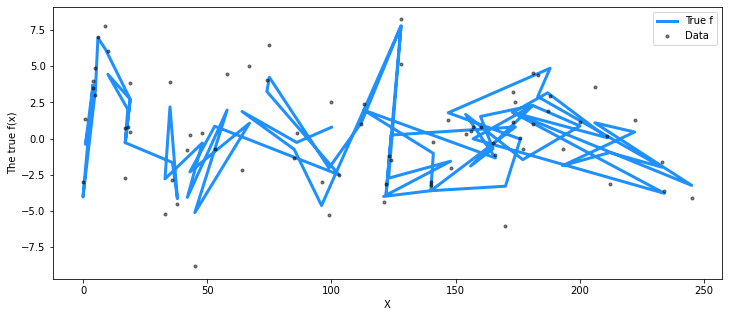

> MAP of Marginal Likelihood:

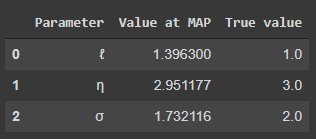

> Of the total population surveyed, the True_f was the population that answered "yes" they knew someone who is gay:
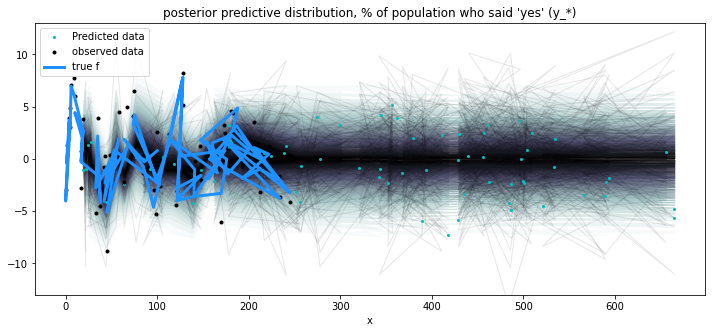

### Code 5

In [ ]:
#@title
! pip install pymc3 --upgrade
! pip install arviz
! pip install pandas --upgrade
!pip install modelutils

In [1]:
#@title
import numpy as np, scipy as sp, pandas as pd, pymc3 as pm, matplotlib.pyplot as plt, theano.tensor as tt
from scipy import stats
import modelutils
from modelutils import *
import arviz as az

In [147]:
#@title
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cmap
cm = cmap.inferno

import numpy as np
import scipy as sp
import theano
import theano.tensor as tt
import theano.tensor.nlinalg
import sys
sys.path.insert(0, "../../..")
import pymc3 as pm

In [ ]:
#@title
ages = pd.read_csv('naes_grouped.csv')
ages

In [146]:
#@title

import pymc3 as pm
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [188]:
#@title
sum_ages = ages['yes'] + ages['n']
ages['total_pop'] = sum_ages
ages

Unnamed: 0  age  yes    n  total_pop
0            0   18  100  200        300
1            1   19   86  153        239
2            2   20   64  128        192
3            3   21   85  172        257
4            4   22   96  182        278
..         ...  ...  ...  ...        ...
68          68   86    4   40         44
69          69   87    1   23         24
70          70   88    5   23         28
71          71   89    0   19         19
72          72   90    4   18         22

[73 rows x 5 columns]

In [207]:
max(ages.total_pop)

431

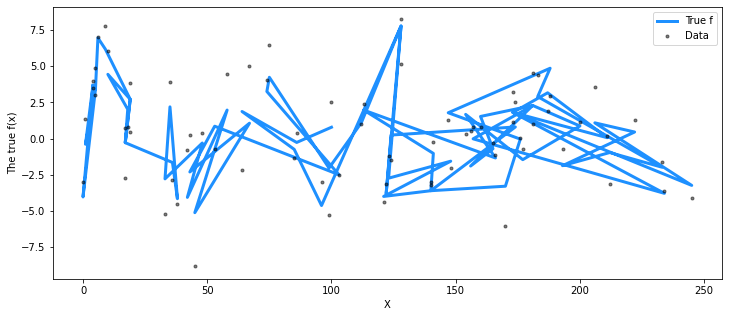

In [235]:

# set the seed
np.random.seed(1)

# n = 100 # The number of data points
# X = np.linspace(0, 10, n)[:, None] # The inputs to the GP, they must be arranged as a column vector

X = (ages['yes'].values)[:, None]
n= len(ages)


# Define the true covariance function and its parameters
ℓ_true = 1.0
η_true = 3.0
cov_func = η_true**2 * pm.gp.cov.Matern52(1, ℓ_true) #ExpQuad

# A mean function that is zero everywhere
mean_func = pm.gp.mean.Zero()

# The latent function values are one sample from a multivariate normal
# Note that we have to call `eval()` because PyMC3 built on top of Theano
f_true = np.random.multivariate_normal(mean_func(X).eval(),
                                       cov_func(X).eval() + 1e-8*np.eye(n), 1).flatten()

# The observed data is the latent function plus a small amount of IID Gaussian noise
# The standard deviation of the noise is `sigma`
σ_true = 2.0
y = f_true + σ_true * np.random.randn(n)

## Plot the data and the unobserved latent function
fig = plt.figure(figsize=(12,5)); ax = fig.gca()
ax.plot(X, f_true, "dodgerblue", lw=3, label="True f");
ax.plot(X, y, 'ok', ms=3, alpha=0.5, label="Data");
ax.set_xlabel("X"); ax.set_ylabel("The true f(x)"); plt.legend();

In [236]:
with pm.Model() as model:
    ℓ = pm.Gamma("ℓ", alpha=1, beta=1)
    η = pm.HalfCauchy("η", beta=5)

    cov = η**2 * pm.gp.cov.Matern52(1, ℓ)
    gp = pm.gp.Marginal(cov_func=cov)

    σ = pm.HalfCauchy("σ", beta=5)
    y_ = gp.marginal_likelihood("y", X=X, y=y, noise=σ)

    mp = pm.find_MAP()

In [237]:
# collect the results into a pandas dataframe to display
# "mp" stands for marginal posterior
pd.DataFrame({"Parameter": ["ℓ", "η", "σ"],
              "Value at MAP": [float(mp["ℓ"]), float(mp["η"]), float(mp["σ"])],
              "True value": [ℓ_true, η_true, σ_true]})

Parameter  Value at MAP  True value
0         ℓ      1.396300         1.0
1         η      2.951177         3.0
2         σ      1.732116         2.0

In [238]:
# new values from x=0 to x=20
X_new = (ages['total_pop'].values)[:, None]

# add the GP conditional to the model, given the new X values
with model:
    f_predy = gp.conditional("f_predy", X_new)

# To use the MAP values, you can just replace the trace with a length-1 list with `mp`
with model:
    pred_samples = pm.sample_posterior_predictive([mp], vars=[f_predy], samples=2000)

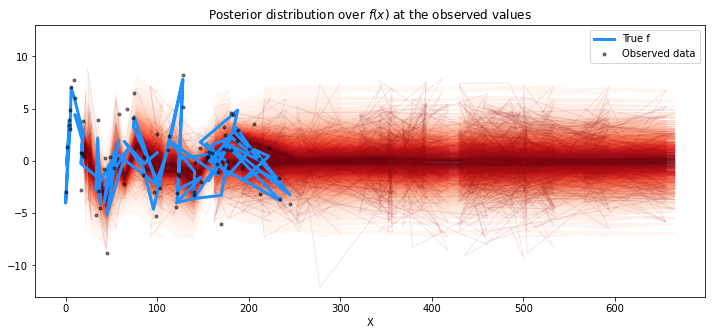

In [239]:
# plot the results
fig = plt.figure(figsize=(12,5)); ax = fig.gca()

# plot the samples from the gp posterior with samples and shading
from pymc3.gp.util import plot_gp_dist
plot_gp_dist(ax, pred_samples["f_predy"], X_new);

# plot the data and the true latent function
plt.plot(X, f_true, "dodgerblue", lw=3, label="True f");
plt.plot(X, y, 'ok', ms=3, alpha=0.5, label="Observed data");

# axis labels and title
plt.xlabel("X"); plt.ylim([-13,13]);
plt.title("Posterior distribution over $f(x)$ at the observed values"); plt.legend();

In [240]:
with model:
    y_predy2 = gp.conditional("y_predy2", X_new, pred_noise=True)
    y_samples = pm.sample_posterior_predictive([mp], vars=[y_predy2], samples=2000)

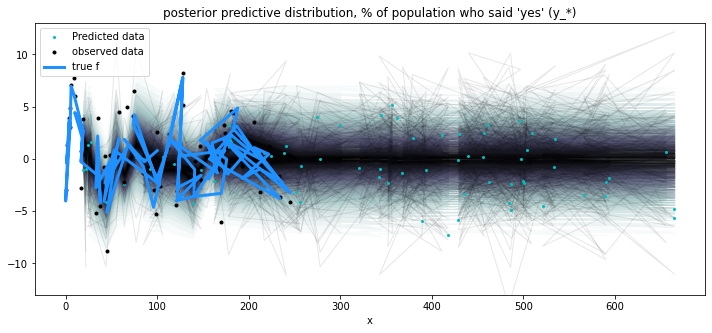

In [244]:
fig = plt.figure(figsize=(12,5)); ax = fig.gca()

# posterior predictive distribution
plot_gp_dist(ax, y_samples["y_predy2"], X_new, plot_samples=True, palette="bone_r");

# overlay a scatter of one draw of random points from the
#   posterior predictive distribution
plt.plot(X_new, y_samples["y_predy2"][800, :].T, "co", ms=2, label="Predicted data");

# plot original data and true function
plt.plot(X, y, 'ok', ms=3, alpha=1.0, label="observed data");
plt.plot(X, f_true, "dodgerblue", lw=3, label="true f");

plt.xlabel("x"); plt.ylim([-13,13]);
plt.title("posterior predictive distribution, % of population who said 'yes' (y_*)"); plt.legend();

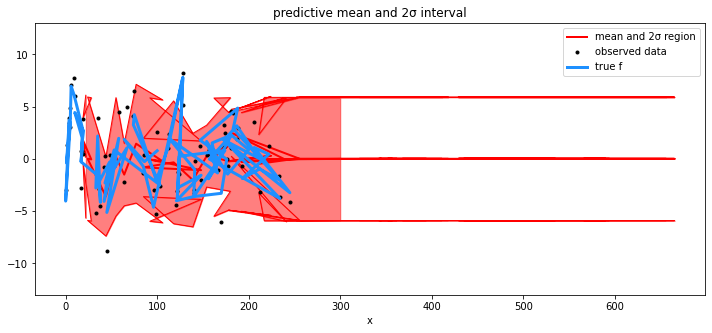

In [242]:

# predict
mu, var = gp.predict(X_new, point=mp, diag=True)
sd = np.sqrt(var)

# draw plot
fig = plt.figure(figsize=(12,5)); ax = fig.gca()

# plot mean and 2σ intervals
plt.plot(X_new, mu, 'r', lw=2, label="mean and 2σ region");
plt.plot(X_new, mu + 2*sd, 'r', lw=1); plt.plot(X_new, mu - 2*sd, 'r', lw=1);
plt.fill_between(X_new.flatten(), mu - 2*sd, mu + 2*sd, color="r", alpha=0.5)

# plot original data and true function
plt.plot(X, y, 'ok', ms=3, alpha=1.0, label="observed data");
plt.plot(X, f_true, "dodgerblue", lw=3, label="true f");

plt.xlabel("x"); plt.ylim([-13,13]);
plt.title("predictive mean and 2σ interval"); plt.legend();

In [168]:
# X = (ages['yes'].values)[:, None]
# n= len(ages)

# with pm.Model() as marginal_gp_model:
#     # Specify the covariance function.
#     cov_func = pm.gp.cov.ExpQuad(1, ls=0.1)

#     # Specify the GP.  The default mean function is `Zero`.
#     gp = pm.gp.Marginal(cov_func=cov_func)

#     # The scale of the white noise term can be provided,
#     sigma = pm.HalfCauchy("sigma", beta=5)
#     y_ = gp.marginal_likelihood("y", X=X, y=y, noise=sigma)

#     # OR a covariance function for the noise can be given
#     # noise_l = pm.Gamma("noise_l", alpha=2, beta=2)
#     # cov_func_noise = pm.gp.cov.Exponential(1, noise_l) + pm.gp.cov.WhiteNoise(sigma=0.1)
#     # y_ = gp.marginal_likelihood("y", X=X, y=y, noise=cov_func_noise)

# # vector of new X points we want to predict the function at
# Xnew = (ages['age'].values)[:, None]

# with marginal_gp_model:
#     f_star = gp.conditional("f_star", Xnew=Xnew)

#     # or to predict the GP plus noise
#     y_star = gp.conditional("y_star", Xnew=Xnew, pred_noise=True)

# mu, var = gp.predict(Xnew, point=trace[-1],  diag=True)


In [ ]:
#@title
n= len(ages)

X = ages['yes'].values
X

In [ ]:
#@title
#  A one dimensional column vector of inputs.
X = (ages['yes'].values)[:, None]
X_star = ages.values[:, None]

with pm.Model() as model:
    # Specify the covariance function.
    cov_func = pm.gp.cov.Matern52(1, ls=0.3)

    # Specify the GP.  The default mean function is `Zero`.
    gp = pm.gp.Latent(cov_func=cov_func)

    # Place a GP prior over the function f.
    f = gp.prior("f", X=X)

    f_star = gp.conditional("f_star", X_star)

    f = gp.marginal_likelihood("f", X, y, noise)
    trace = pm.sample(1000)


# After fitting or sampling, specify the distribution
# # at new points with .conditional
# Xnew = np.linspace(-1, 2, 50)[:, None]

# with model:
#     fcond = gp.conditional("fcond", Xnew=Xnew)

In [ ]:
#@title
# np.random.seed(20090425)
# X = np.sort(3*np.random.rand(n))[:,None]

X = (ages['yes'].values)[:, None]
n= len(ages)

with pm.Model() as model:
    # f(x)
    l_true = 0.3
    s2_f_true = 1.0
    cov = s2_f_true * pm.gp.cov.Matern52(1, l_true)
    # cov = s2_f_true * pm.gp.cov.Matern12(1, l_true)
    # cov = s2_f_true * pm.gp.cov.ExpQuad(1, l_true)

    # noise, epsilon
    s2_n_true = 0.1
    K_noise = s2_n_true**2 * tt.eye(n)
    K = cov(X) + K_noise
    
# evaluate the covariance with the given hyperparameters
K = theano.function([], cov(X) + K_noise)()

# generate fake data from GP with white noise (with variance sigma2)
y = np.random.multivariate_normal(np.zeros(n), K)

fig = plt.figure(figsize=(14,5)); ax = fig.add_subplot(111)
ax.plot(X, y, 'ok', ms=10);
ax.set_xlabel("x");
ax.set_ylabel("f(x)");

In [ ]:
#@title
# Z = (ages['yes'].values)[:, None]

with pm.Model() as model:
    # priors on the covariance function hyperparameters
    l = pm.Uniform('l', 0, 10)

    # uninformative prior on the function variance
    log_s2_f = pm.Uniform('log_s2_f', lower=-10, upper=5)
    s2_f = pm.Deterministic('s2_f', tt.exp(log_s2_f))

    # uninformative prior on the noise variance
    log_s2_n = pm.Uniform('log_s2_n', lower=-10, upper=5)
    s2_n = pm.Deterministic('s2_n', tt.exp(log_s2_n))

    # covariance functions for the function f and the noise
    f_cov = s2_f * pm.gp.cov.Matern52(1, l)
    y_obs = pm.gp.gp.MarginalSparse('y_obs', cov_func=f_cov) #, observed={'X':X, 'Y':y}) # mean_func=s2_n, sigma = s2_n,


    trace = pm.sample(2000)

## 6. (Filtering in a dynamical model.)
Consider the problem of tracking an object moving along a ballistic trajectory (e.g. a cannonball fired from a cannon). The cannonball is launched from a position $(x0; y0) = (0; 0)$ with initial velocity $(x_ 0; y_0)$ determined by $x^{.} = ||v|| cos \theta, y_ = ||v|| sin \theta$, where $||v|| \sin N(400; 20)$ and $\theta \sim N(\pi/2; 0.1)$. 

A camera takes pictures at a time step of t which give observations of (x; y) that are corrupted by Gaussian noise with variance (10 m)2 in each coordinate. Assume we also have accelerometers in the ball which provide precise estimates of the velocity $(x^{.} ; y^{.})$, with noise of variance $(0.5 (m/s)^)2$. (All errors are assumed independent.)

In terms of the position and velocity, the linear dynamical system governing the fight of the cannonball with time step t is:


This has the form:
$x_{k+1} = Ax_k + Bu_k$
so we can use a Kalman lter to estimate the true position $(x_k; y_k)$.

(a) Generate a sequence of positions and observations according to the distributions above.


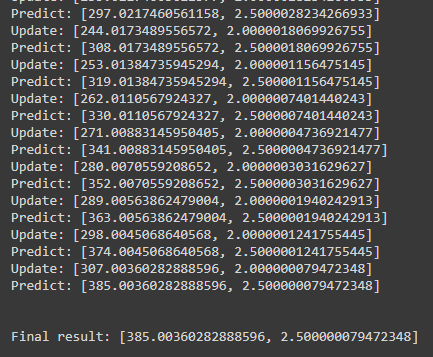

(b) Implement a Kalman filter to estimate the true position from the observations. You will have to pick a value for the process noise covariance Q. Plot (on the same axes) the observations, the estimates, and the true trajectory of the cannonball. What happens if you use a measurement noise
matrix R that substantially over- or under-estimates the true noise variances?

### Code for question 6

In [16]:
!pip install filterpy
import numpy as np
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
# import kf_book.kf_internal as kf_internal
# from kf_book.kf_internal import DogSimulation

In [69]:
my_filter = KalmanFilter(dim_x=2, dim_z=1)

# abs_v = pm.Normal('abs_v', 400, 200)
# omeg = pm.Normal('omeg', (pi/2), .1)

# x_dot = abs_v*cos(omeg)
# y_dot = obs_v*sin(omeg)

# noise_v = .5 ##noise of variance (.5(m/s)^2)

my_filter.x = np.array([[0., 0.],    # position
                [200, pi]])   # velocity

# my_filter.x = np.array([[2.],
#                 [0.]])       # initial state (location and velocity)

my_filter.F = np.array([[1.,1.],
                [0.,1.]])    # state transition matrix

my_filter.H = np.array([[10.,0.5]])    # Measurement function
my_filter.P *= 1000.                 # covariance matrix
my_filter.R = .5                      # state uncertainty
my_filter.Q = Q_discrete_white_noise(dim=2, dt=0.1, var=0.5) # process uncertainty


# for n in range(len(my_filter)):
#     # measurement update, with uncertainty
#     mu, sig = update(mu, sig, measurements[n], measurement_sig)
#     print('Update: [{}, {}]'.format(mu, sig))
#     # motion update, with uncertainty
#     mu, sig = predict(mu, sig, motions[n], motion_sig)
#     print('Predict: [{}, {}]'.format(mu, sig))
measurement_sig = 10.
# motion_sig = .5
# mu = 0.
# sig = 10000.

while True:

    z, R = measurement_sig, my_filter.R
    x, P = predict(x, P, my_filter, my_filter.Q)
    x, P = update(my_filter.x, my_filter.P, z, R, my_filter.H)

print(x, P)
#     # do something with the output
#     x = my_filter.x
#     do_something_amazing(x)

TypeError: ignored

In [ ]:

np.random.seed(13)

abs_v = pm.Normal('abs_v', 400, 200)
omeg = pm.Normal('omeg', (pi/2), .1)

x_dot = abs_v*cos(omeg)
y_dot = obs_v*sin(omeg)

process_var = .5 # variance in the dog's movement (actual ball movement, noise variance)
sensor_var = 10. # variance in the sensor (camera, noise variance)

x = gaussian(0., 0)  # dog's position, N(0, 20**2) (ball's inital position is 0,0)
velocity = (x_dot, y_dot)
dt = .5 # time step in seconds
process_model = gaussian(velocity*dt, process_var) # displacement to add to x
  
# simulate dog and get measurements
canon = DogSimulation(
    x0=x.mean, 
    velocity=process_model.mean, 
    measurement_var=sensor_var, 
    process_var=process_model.var)

# create list of measurements
zs = [canon.move_and_sense() for _ in range(400)]

In [ ]:
from filterpy.kalman import KalmanFilter
f = KalmanFilter (dim_x=2, dim_z=1)


# inital velocity = (x_dot, y_dot)
# x_dot = pm.Normal(400, 200)cos(omega)
# y_dot = pm.Normal((pi/2, .1))

abs_v = pm.Normal('abs_v', 400, 200)
omeg = pm.Normal('omeg', (pi/2), .1)

x_dot = abs_v*cos(omeg)
y_dot = obs_v*sin(omeg)

noise_v = .5 ##noise of variance (.5(m/s)^2)

f.x = np.array([[0., 0.],    # position
                [x_dot, y_dot]])   # velocity


f.F = np.array([[1.,1.], #state transition matrix
                [0.,1.]])

f.H = np.array([[1.,0.]]) #measurement function

# f.P *= 1000.
f.P = np.array([[1000.,    0.],  #covariance matrix  Here I take advantage of the fact that P already contains np.eye(dim_x), and just multiply by the uncertainty
                [   0., 1000.] ])

f.R = np.array([[5.]]) #measurement noise

from filterpy.common import Q_discrete_white_noise
f.Q = Q_discrete_white_noise(dim=2, dt=0.1, var=0.5)

# z = get_sensor_reading()
# f.predict()
# f.update(z)

# do_something_with_estimate (f.x)

while True:
    z, R = read_sensor()
    x, P = predict(x, P, F, Q)
    x, P = update(x, P, z, R, H)

for n in range(f):
    # measurement update, with uncertainty
    mu, sig = update(mu, sig, measurements[n], measurement_sig)
    print('Update: [{}, {}]'.format(mu, sig))
    # motion update, with uncertainty
    mu, sig = predict(mu, sig, motions[n], motion_sig)
    print('Predict: [{}, {}]'.format(mu, sig))



# x : ndarray (dim_x, 1), default = [0,0,0…0] # filter state estimate
# P : ndarray (dim_x, dim_x), default eye(dim_x) # covariance matrix
# Q : ndarray (dim_x, dim_x), default eye(dim_x) # Process uncertainty/noise
# R : ndarray (dim_z, dim_z), default eye(dim_x) # measurement uncertainty/noise
# H : ndarray (dim_z, dim_x) # measurement function
# F : ndarray (dim_x, dim_x) # state transistion matrix
# B : ndarray (dim_x, dim_u), default 0 # control transition matrix


In [3]:
from math import *
import matplotlib.pyplot as plt
import numpy as np

# gaussian function
def f(mu, sigma2, x):
    ''' f takes in a mean and squared variance, and an input x
       and returns the gaussian value.'''
    coefficient = 1.0 / sqrt(2.0 * pi *sigma2)
    exponential = exp(-0.5 * (x-mu) ** 2 / sigma2)
    return coefficient * exponential

In [4]:
# the update function
def update(mean1, var1, mean2, var2):
    ''' This function takes in two means and two squared variance terms,
        and returns updated gaussian parameters.'''
    # Calculate the new parameters
    new_mean = (var2*mean1 + var1*mean2)/(var2+var1)
    new_var = 1/(1/var2 + 1/var1)
    
    return [new_mean, new_var]


# the motion update/predict function
def predict(mean1, var1, mean2, var2):
    ''' This function takes in two means and two squared variance terms,
        and returns updated gaussian parameters, after motion.'''
    # Calculate the new parameters
    new_mean = mean1 + mean2
    new_var = var1 + var2
    
    return [new_mean, new_var]

In [31]:
measurements = [i for i in range(400)]
motions = [(i*2) for i in range(400)]
# motions

In [44]:
# measurements for mu and motions, U


measurements = [i for i in range(40)] #np.random.rand(1,40) #[i for i in range(400)]

motions = [(i*2) for i in range(40)]

# initial parameters
measurement_sig = 10.
motion_sig = .5
mu = 0.
sig = 10000.


## TODO: Loop through all measurements/motions
# this code assumes measurements and motions have the same length
# so their updates can be performed in pairs
for n in range(len(measurements)):
    # measurement update, with uncertainty
    mu, sig = update(mu, sig, measurements[n], measurement_sig)
    print('Update: [{}, {}]'.format(mu, sig))
    # motion update, with uncertainty
    mu, sig = predict(mu, sig, motions[n], motion_sig)
    print('Predict: [{}, {}]'.format(mu, sig))


# np.random.seed(13)

# abs_v = pm.Normal('abs_v', 400, 200)
# omeg = pm.Normal('omeg', (pi/2), .1)

# x_dot = abs_v*cos(omeg)
# y_dot = obs_v*sin(omeg)

# process_var = .5 # variance in the dog's movement (actual ball movement, noise variance)
# sensor_var = 10. # variance in the sensor (camera, noise variance)

# x = gaussian(0., 0)  # dog's position, N(0, 20**2) (ball's inital position is 0,0)
# velocity = (x_dot, y_dot)
# dt = .5 # time step in seconds
# process_model = gaussian(velocity*dt, process_var) # displacement to add to x
  
# # simulate dog and get measurements
# canon = DogSimulation(
#     x0=x.mean, 
#     velocity=process_model.mean, 
#     measurement_var=sensor_var, 
#     process_var=process_model.var)

# # create list of measurements
# zs = [canon.move_and_sense() for _ in range(400)]

# print the final, resultant mu, sig
print('\n')
print('Final result: [{}, {}]'.format(mu, sig))

Update: [0.0, 9.99000999000999]
Predict: [0.0, 10.49000999000999]
Update: [0.5119572901684504, 5.119572901684503]
Predict: [2.5119572901684504, 5.619572901684503]
Update: [2.327766510256652, 3.597776288158594]
Predict: [6.327766510256652, 4.0977762881585935]
Update: [5.360490365457001, 2.9066827309499264]
Predict: [11.360490365457, 3.4066827309499264]
Update: [9.490165250547012, 2.541033303552002]
Predict: [17.49016525054701, 3.041033303552002]
Update: [14.577588646403541, 2.3318959723258366]
Predict: [24.57758864640354, 2.8318959723258366]
Update: [20.477664630752358, 2.2069193659559754]
Predict: [32.47766463075236, 2.7069193659559754]
Update: [27.05022924676095, 2.1302719313764427]
Predict: [41.05022924676095, 2.6302719313764427]
Update: [34.16747242365917, 2.0825140944449934]
Predict: [50.16747242365917, 2.5825140944449934]
Update: [41.71800223282408, 2.0524627074211965]
Predict: [59.71800223282408, 2.5524627074211965]
Update: [49.60816565774785, 2.033435802133189]
Predict: [69.6081

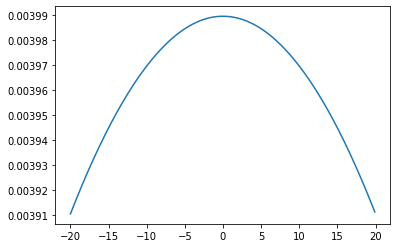

In [50]:
# display the *initial* gaussian over a range of x values
# define the parameters
mu = 0
sigma2 = 10000

# define a range of x values
x_axis = np.arange(-20, 20, 0.1)

# create a corresponding list of gaussian values
g = []
for x in x_axis:
    g.append(f(mu, sigma2, x))

# plot the result 
plt.plot(x_axis, g)

In [60]:
from numpy import * 
from numpy import dot, sum, tile, linalg
from numpy.linalg import inv

In [51]:
from numpy import dot
def kf_predict(X, P, A, Q, B, U):
 X = dot(A, X) + dot(B, U)
 P = dot(A, dot(P, A.T)) + Q
 return(X,P) 

In [53]:
def kf_update(X, P, Y, H, R):
 IM = dot(H, X)
 IS = R + dot(H, dot(P, H.T))
 K = dot(P, dot(H.T, inv(IS)))
 X = X + dot(K, (Y-IM))
 P = P - dot(K, dot(IS, K.T))
 LH = gauss_pdf(Y, IM, IS)
 return (X,P,K,IM,IS,LH)

In [55]:
def gauss_pdf(X, M, S):
 if M.shape()[1] == 1:
     DX = X - tile(M, X.shape()[1])
     E = 0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
     E = E + 0.5 * M.shape()[0] * log(2 * pi) + 0.5 * log(det(S))
     P = exp(-E)
 elif X.shape()[1] == 1:
   DX = tile(X, M.shape()[1])- M
   E = 0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
   E = E + 0.5 * M.shape()[0] * log(2 * pi) + 0.5 * log(det(S))
   P = exp(-E)
 else:
   DX = X-M
   E = 0.5 * dot(DX.T, dot(inv(S), DX))
   E = E + 0.5 * M.shape()[0] * log(2 * pi) + 0.5 * log(det(S))
   P = exp(-E)
 return (P[0],E[0]) 

In [61]:
#time step of mobile movement
dt = 0.1
# Initialization of state matrices
X = np.array([[0.0], [0.0], [0.1], [0.1]])
P = diag((0.01, 0.01, 0.01, 0.01))
A = np.array([[1, 0, dt , 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])
Q = eye(X.shape()[0])
B = eye(X.shape()[0])
U = zeros((X.shape()[0],1)) 

# Measurement matrices
Y = np.array([[X[0,0] + abs(randn(1)[0])], [X[1,0] + abs(randn(1)[0])]])
H = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])
R = eye(Y.shape()[0])

# Number of iterations in Kalman Filter
N_iter = 50

# Applying the Kalman Filter
for i in arange(0, N_iter):
 (X, P) = kf_predict(X, P, A, Q, B, U)
 (X, P, K, IM, IS, LH) = kf_update(X, P, Y, H, R)
 Y = np.array([[X[0,0] + abs(0.1 * randn(1)[0])],[X[1, 0] + abs(0.1 * randn(1)[0])]])

TypeError: ignored

In [77]:
! easy_install pykalman
# ! easy_install numpy scipy Sphinx numpydoc nose pykalman
!pip install --upgrade pykalman

Searching for pykalman
Best match: pykalman 0.9.5
Processing pykalman-0.9.5-py2.7.egg
pykalman 0.9.5 is already the active version in easy-install.pth

Using /usr/local/lib/python2.7/dist-packages/pykalman-0.9.5-py2.7.egg
Processing dependencies for pykalman
Finished processing dependencies for pykalman
     |████████████████████████████████| 235kB 9.1MB/s 
  Created wheel for pykalman: filename=pykalman-0.9.5-cp36-none-any.whl size=48464 sha256=9bed24bbe7cbaf7dc44fa94f344e7244334881334a771e731d75d5edbb575e32
  Stored in directory: /root/.cache/pip/wheels/d9/e8/6a/553d9832679cb74a8434fa597c3abdb07313e40054a0adf9ac
Successfully built pykalman


In [78]:
import pykalman
from pykalman import KalmanFilter
import numpy as np
kf = KalmanFilter(transition_matrices = [[1, 1], [0, 1]], observation_matrices = [[0.1, 0.5], [-0.3, 0.0]])
measurements = np.asarray([[1,0], [0,0], [0,1]])  # 3 observations
kf = kf.em(measurements, n_iter=5)
(filtered_state_means, filtered_state_covariances) = kf.filter(measurements)
(smoothed_state_means, smoothed_state_covariances) = kf.smooth(measurements)


In [79]:
from numpy import ma
measurements = ma.asarray(measurements)
measurements[1] = ma.masked   # measurement at timestep 1 is unobserved
kf = kf.em(measurements, n_iter=5)
(filtered_state_means, filtered_state_covariances) = kf.filter(measurements)
(smoothed_state_means, smoothed_state_covariances) = kf.smooth(measurements)

In [80]:
from pykalman import KalmanFilter
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=2)

In [84]:
from scipy.stats import norm
import numpy as np
n_timesteps = 100
n_dim_state = 0
n_dim_obs = 80

initial_state_mean = 

states = np.zeros((n_timesteps, n_dim_state))
measurements = np.zeros((n_timesteps, n_dim_obs))
for t in range(n_timesteps-1):
   if t == 0:
      states[t] = norm.rvs(initial_state_mean, np.sqrt(initial_state_covariance))
      measurements[t] = (
          np.dot(observation_matrices[t], states[t])
          + observation_offsets[t]
          + norm.rvs(0, np.sqrt(observation_covariance)))
      states[t+1] = (
          np.dot(transition_matrices[t], states[t]) + transition_offsets[t] + norm.rvs(0, np.sqrt(transition_covariance)))
      measurements[t+1] = (np.dot(observation_matrices[t+1], states[t+1]) + observation_offsets[t+1] + norm.rvs(np.sqrt(observation_covariance)))

NameError: ignored